In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

combi = pd.read_table('Historical_combi2.csv',delimiter =',')

combi=combi.fillna(0)
print(combi)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import linear_model
import statsmodels.api as sm
#X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
#Y = df['Stock_Index_Price']
 
# with sklearn
#regr = linear_model.LinearRegression()
#regr.fit(X, Y)

X = combi[['Maya USGC','FO 3.5%']]
Y = combi['Mars']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

New_Du = -5.675
New_FO35 = -7.42
print ('Predicted Maya: \n', regr.predict([[New_Du, New_FO35]]))

         Date  Dated Brent  Bonny light  Mars   WTI  Maya Europe  Maya USGC  \
0    1/1/2000         25.5          0.0   0.0   0.0          0.0        0.0   
1    1/2/2000         27.9          0.0   0.0   0.0          0.0        0.0   
2    1/3/2000         27.3          0.0   0.0   0.0          0.0        0.0   
3    1/4/2000         22.6          0.0   0.0   0.0          0.0        0.0   
4    1/5/2000         27.6          0.0   0.0   0.0          0.0        0.0   
..        ...          ...          ...   ...   ...          ...        ...   
231  1/4/2019         71.3          1.4  -2.3  -7.4         -9.8       -6.5   
232  1/5/2019         71.1          1.9  -4.3 -10.3        -10.1       -8.4   
233  1/6/2019         64.1          1.7  -4.6  -9.4         -8.1       -5.2   
234  1/7/2019         64.0          1.4  -2.0  -6.5         -6.9       -4.1   
235  1/8/2019         59.0          1.3  -1.9  -4.2        -12.6       -8.0   

     ESPO  Urals NWE  Urals MED  ...   FO 0.5%    V

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                    mean        min         max        std
Dated Brent    64.580932  18.700000  133.200000  30.167944
Bonny light     1.279817  -0.800000    4.600000   0.996303
Mars           -4.062500 -16.300000    0.300000   2.333084
WTI            -4.792638 -27.600000    5.400000   6.814938
Maya Europe   -10.640559 -22.900000   -2.400000   3.479214
Maya USGC      -9.694811 -30.700000   -1.500000   4.604153
ESPO            0.705172  -3.200000    4.700000   1.457965
Urals NWE      -1.975847  -7.600000    0.400000   1.342828
Urals MED      -1.706356  -7.300000    1.200000   1.381967
Dubai          -2.503814 -12.100000    2.600000   2.036371
LLS             1.310169 -10.800000    8.900000   2.335844
Propane       -23.999685 -59.715052    1.984360  14.513136
Gasoline       11.156211   0.756580   25.885038   4.603967
Jet            14.315100   3.026995   41.071374   6.249088
Gasoil         14.384254   5.869023   37.595382   5.343324
FO 1%          -7.736190 -26.345424    1.731123   5.5595

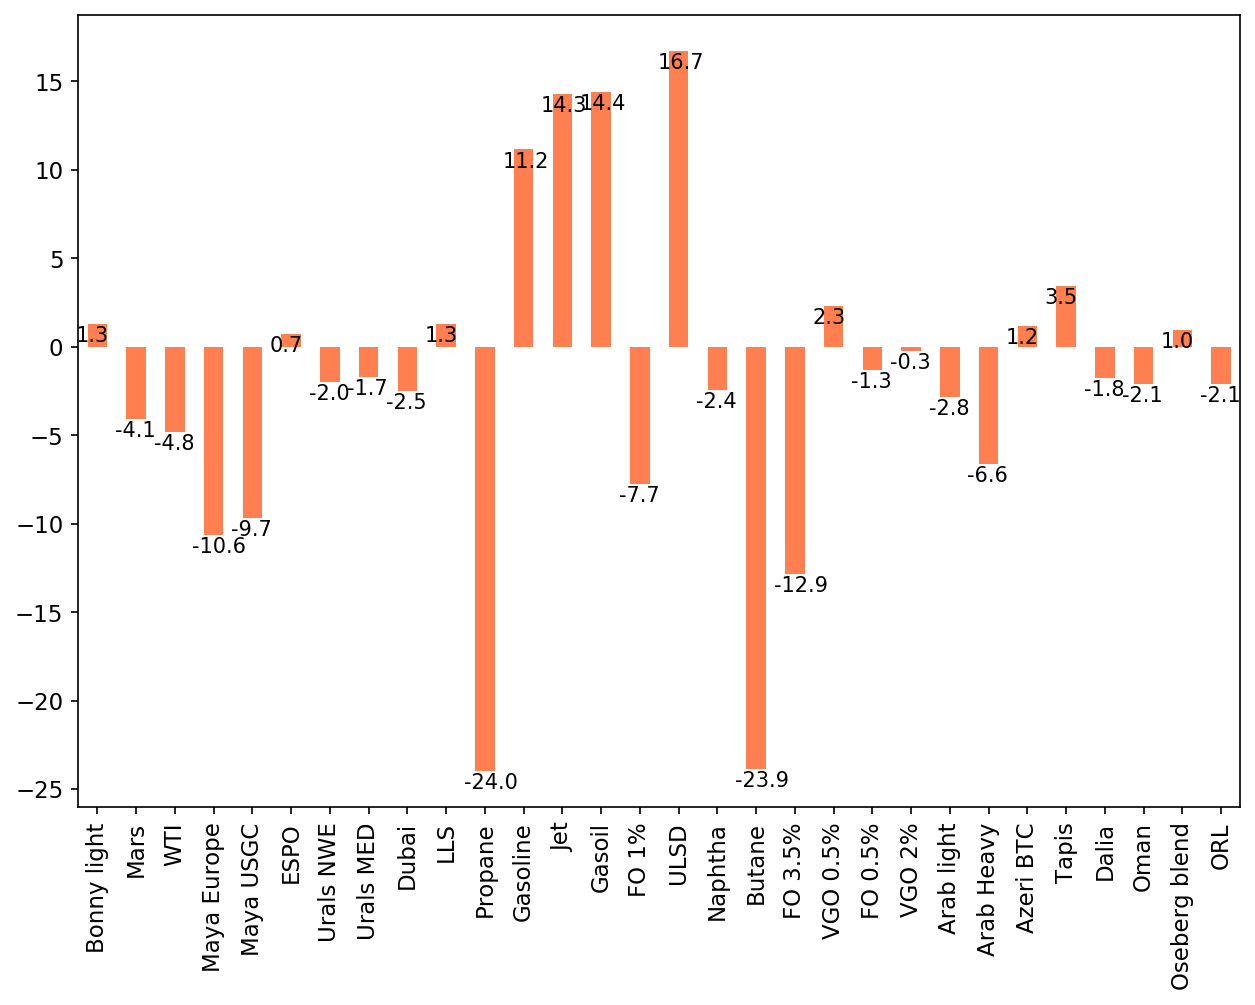

In [2]:
combi_nan = pd.read_table('Historical_combi2.csv',delimiter =',')

data = combi_nan
data_mean = data.iloc[:,1:].apply(lambda x : np.nanmean(x))

data_min = data.iloc[:,1:].apply(lambda x : np.nanmin(x))
data_max = data.iloc[:,1:].apply(lambda x : np.nanmax(x))
data_std = data.iloc[:,1:].apply(lambda x : np.nanstd(x))
data_stats = pd.concat([data_mean,data_min,data_max,data_std],axis=1)
data_stats.columns = ["mean","min","max","std"]


data_stats.to_csv('statistics_diff.csv')

print(data_stats)

plt.rcParams['figure.dpi'] = 150


#ax = data_stats.iloc[1:].plot.bar(y='mean')

ax = data_stats['mean'].iloc[1:].plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=11);
totals =[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.3,i.get_height()-1,str(round(i.get_height(),1)))

In [4]:
data_std = data.iloc[:,1:].apply(lambda x : np.nanstd(x))

data_stats_T = data_stats.transpose()
data_stats_T.shape

cc = combi_nan.iloc[1:,1:]
cc

Dated Brent  Bonny light  Mars   WTI  Maya Europe  Maya USGC  ESPO  \
1           27.9          NaN   NaN   NaN          NaN        NaN   NaN   
2           27.3          NaN   NaN   NaN          NaN        NaN   NaN   
3           22.6          NaN   NaN   NaN          NaN        NaN   NaN   
4           27.6          NaN   NaN   NaN          NaN        NaN   NaN   
5           29.8          NaN   NaN   NaN          NaN        NaN   NaN   
..           ...          ...   ...   ...          ...        ...   ...   
231         71.3          1.4  -2.3  -7.4         -9.8       -6.5   1.7   
232         71.1          1.9  -4.3 -10.3        -10.1       -8.4   0.5   
233         64.1          1.7  -4.6  -9.4         -8.1       -5.2  -0.2   
234         64.0          1.4  -2.0  -6.5         -6.9       -4.1   2.3   
235         59.0          1.3  -1.9  -4.2        -12.6       -8.0   4.2   

     Urals NWE  Urals MED  Dubai  ...   FO 0.5%    VGO 2%  Arab light  \
1         -0.5       -0.5   -3.2  ...       NaN  1.195334        0.75   
2         -1.0       -1.5   -2.2  ...       NaN  1.038289        0.75   
3         -1.0       -1.4   -0.5  ...       NaN -0.616742        0.75   
4         -0.6       -1.2   -1.9  ...       NaN -1.653571        0.50   
5         -1.6       -2.4   -2.6  ...       NaN -0.497769        0.60   
..         ...        ...    ...  ...       ...       ...         ...   
231       -0.1        0.4   -0.3  ... -3.102314  3.919293       -1.90   
232       -0.9       -0.2   -1.7  ... -5.629664  4.786823       -0.80   
233       -2.7       -2.5   -2.3  ... -0.835000  5.262463        0.00   
234       -1.1       -0.5   -0.8  ...  4.105514  5.853681       -1.10   
235       -0.1        1.2    0.1  ... -0.952231  7.948248       -2.70   

     Arab Heavy  Azeri BTC  Tapis  Dalia  Oman  Oseberg blend    ORL  
1           NaN        NaN   -0.4    NaN  -2.5            NaN    NaN  
2           NaN        NaN    1.2    NaN  -1.6            NaN    NaN  
3           NaN        NaN    2.7    NaN   0.1            NaN    NaN  
4           NaN        NaN    1.1    NaN  -1.8            NaN    NaN  
5           NaN        NaN    0.7    NaN  -2.0            NaN    NaN  
..          ...        ...    ...    ...   ...            ...    ...  
231        -4.4        1.8    3.4    0.6  -0.1          1.080 -5.900  
232        -3.5        1.5    2.7    0.1  -1.3          1.522 -5.820  
233        -3.0        0.2    2.1   -0.3  -2.3          1.617 -6.375  
234        -4.0        1.6    3.8    1.2  -0.3          0.786 -6.990  
235        -5.5        2.9    4.4    2.0   0.7          0.683 -6.928  

[235 rows x 31 columns]

In [37]:
cc_new= cc.mask(cc.sub(cc.mean()).div(cc.std()).abs().gt(3))

In [38]:
cc_new_mean = cc_new.apply(lambda x : np.nanmean(x))
cc_new_mean
#cc_new_mean.to_csv('differential_2std_removed.csv')

Dated Brent      64.747234
Bonny light       1.264516
Mars             -3.912698
WTI              -4.651852
Maya Europe     -10.468794
Maya USGC        -9.595261
ESPO              0.705172
Urals NWE        -1.958120
Urals MED        -1.687607
Dubai            -2.464103
LLS               1.401732
Propane         -24.091749
Gasoline         11.042913
Jet              13.838862
Gasoil           13.831706
FO 1%            -7.600926
ULSD             16.119139
Naphtha          -2.397357
Butane          -23.954581
FO 3.5%         -12.578073
VGO 0.5%          2.293681
FO 0.5%          -1.283360
VGO 2%           -0.206798
Arab light       -2.860000
Arab Heavy       -6.642925
Azeri BTC         1.197484
Tapis             3.408155
Dalia            -1.786066
Oman             -2.082051
Oseberg blend     0.967018
ORL              -2.086682
dtype: float64

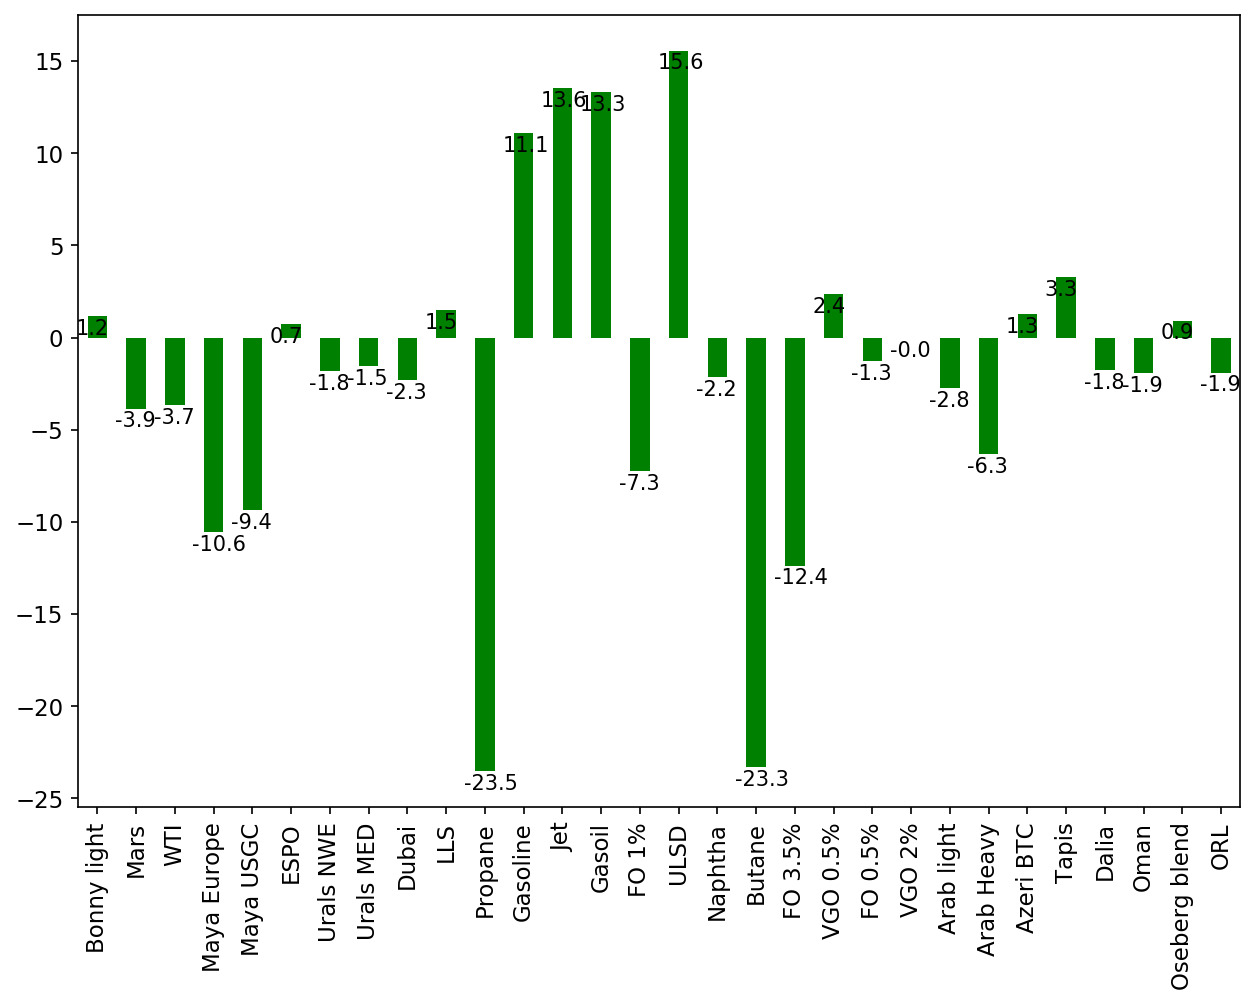

In [6]:
ax = cc_new_mean[1:].plot(kind='bar', figsize=(10,7),
                                        color="green", fontsize=11);
totals =[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.3,i.get_height()-1,str(round(i.get_height(),1)))

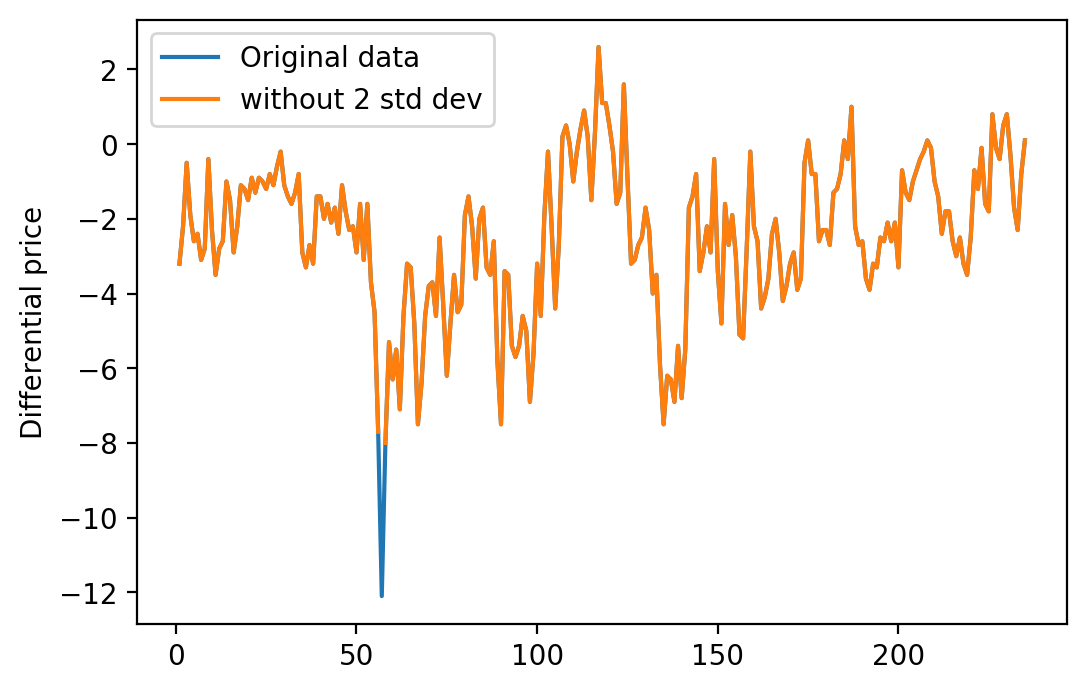

In [39]:
plt.rcParams['figure.dpi'] = 200
plt.plot(cc["Dubai"])
plt.plot(cc_new["Dubai"])
plt.ylabel('Differential price')
plt.legend(['Original data','without 2 std dev'])


In [8]:
cc["Mars"].std(skipna = True) 

2.339183640655868

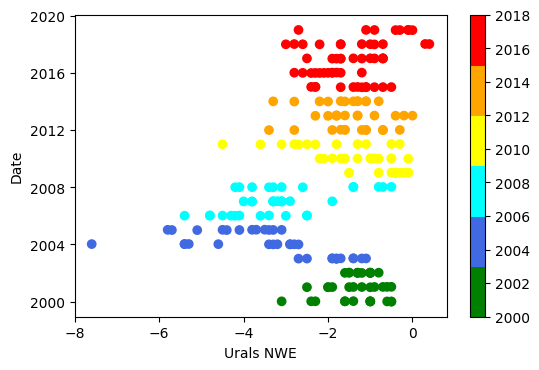

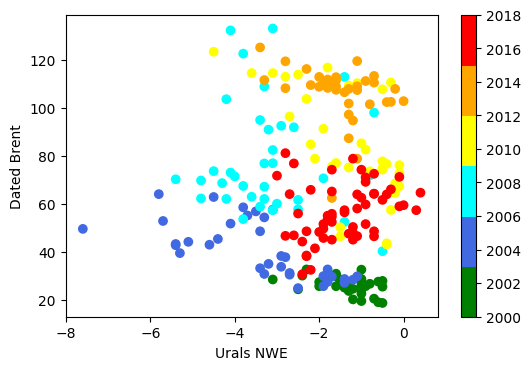

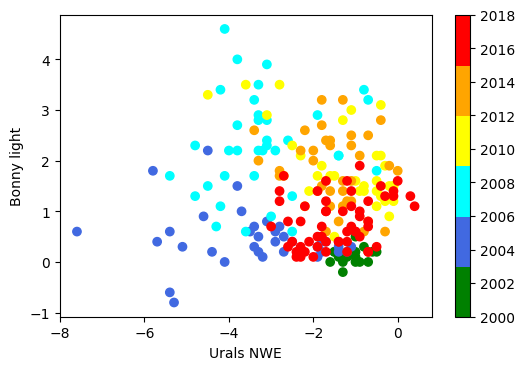

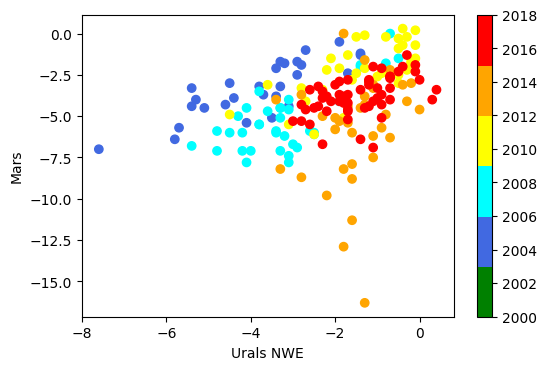

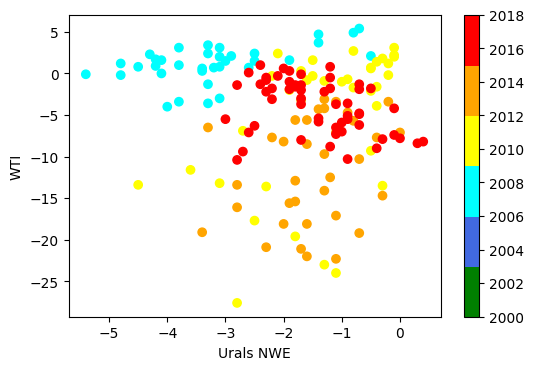

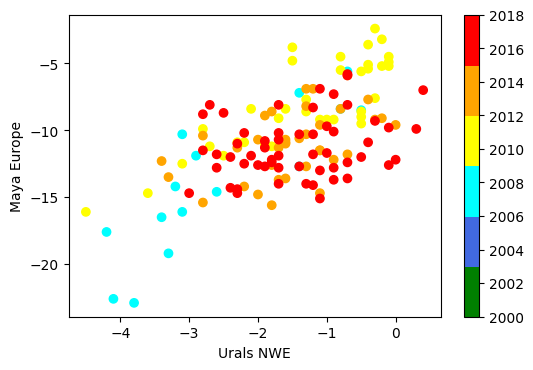

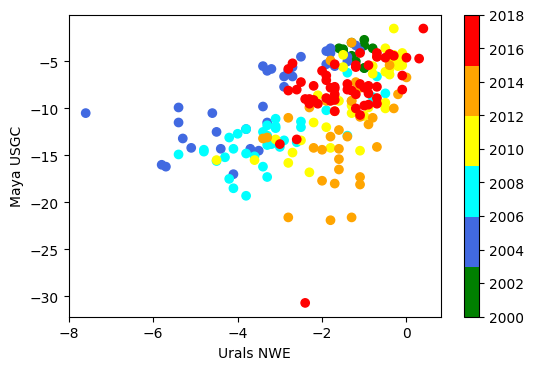

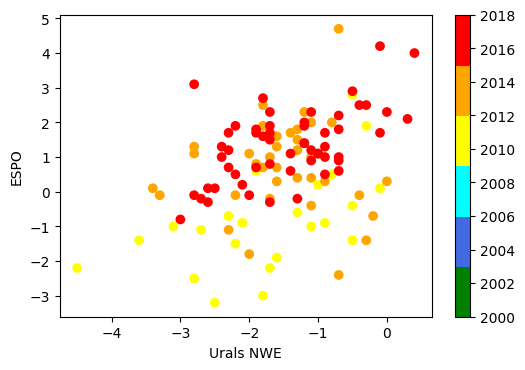

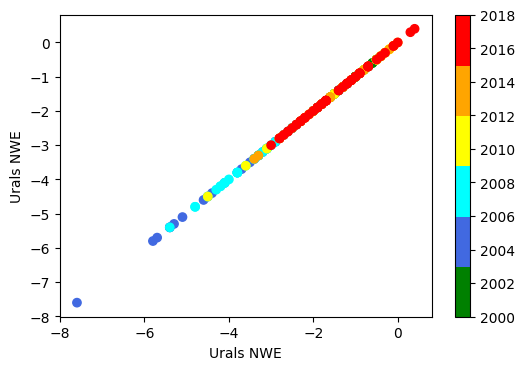

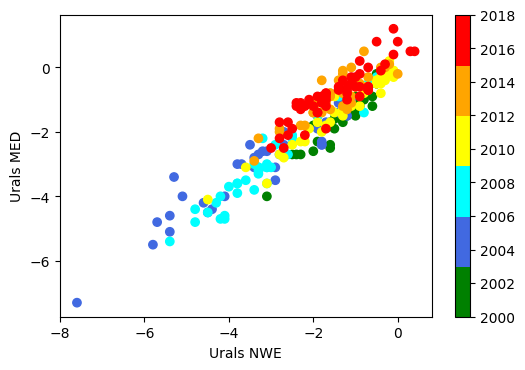

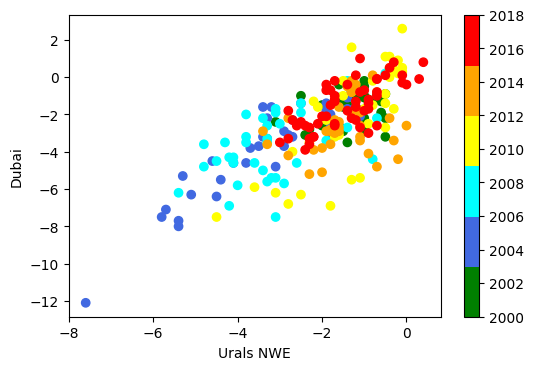

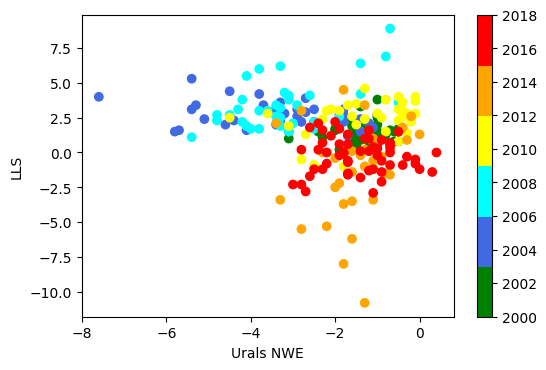

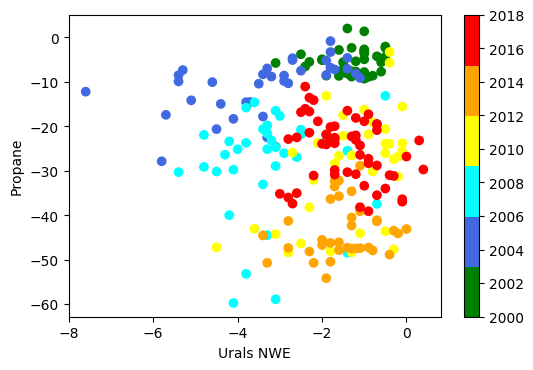

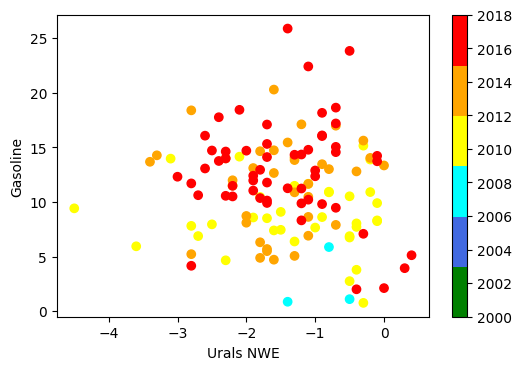

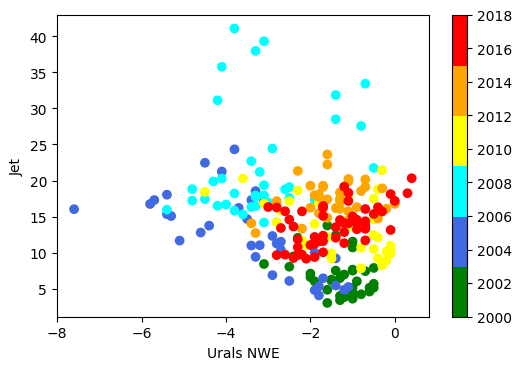

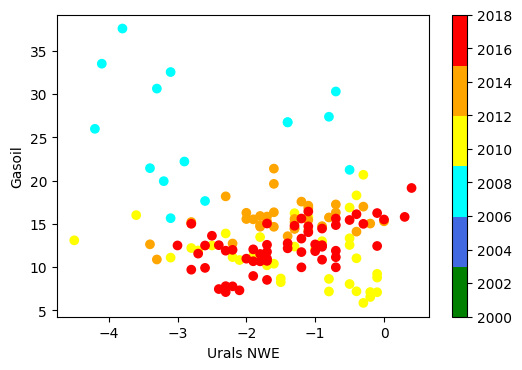

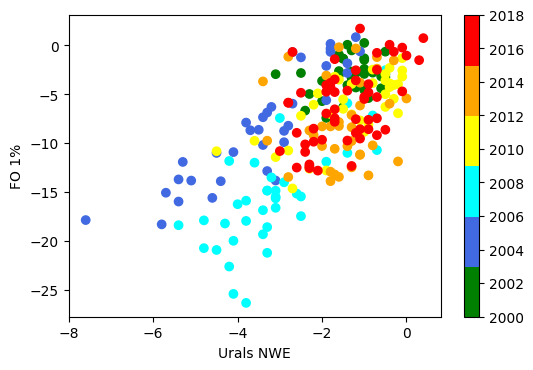

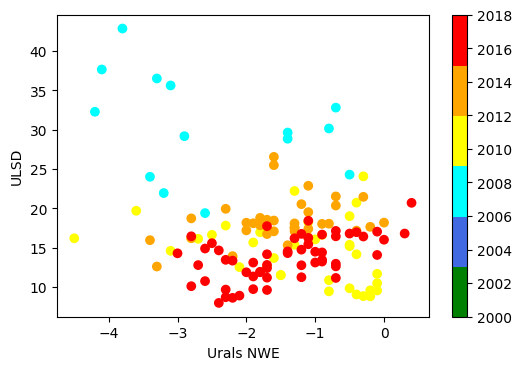

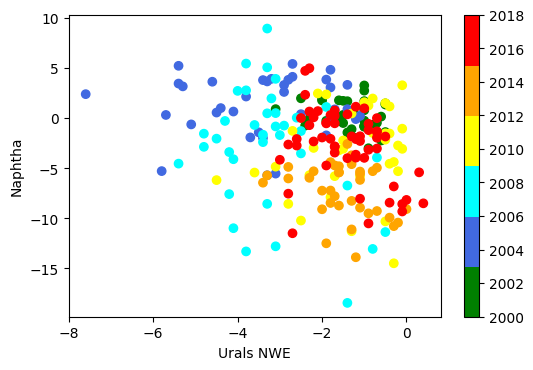

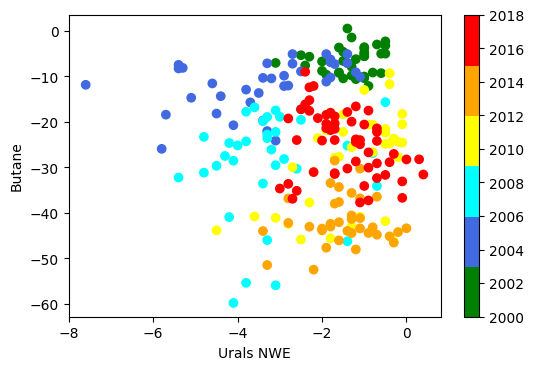

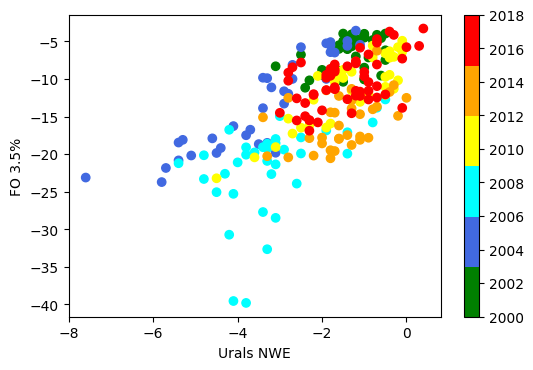

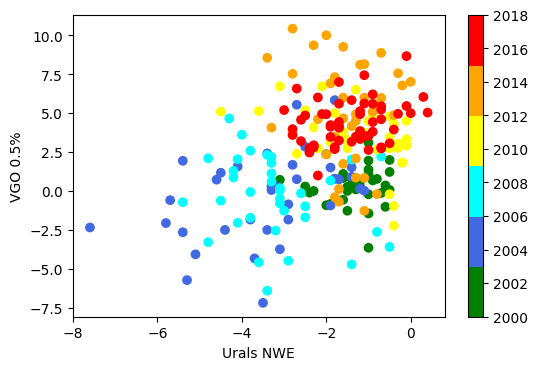

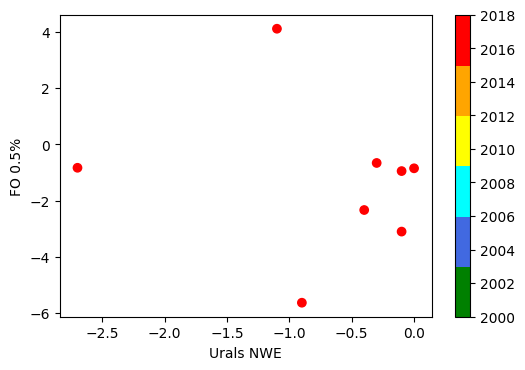

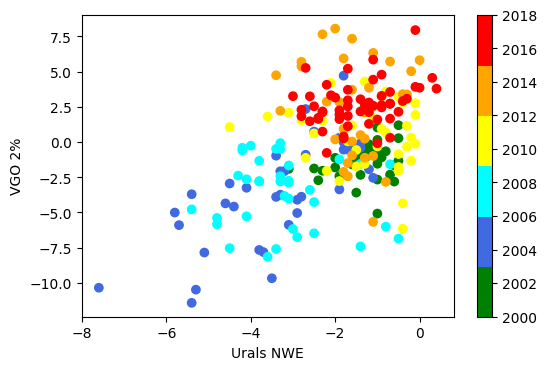

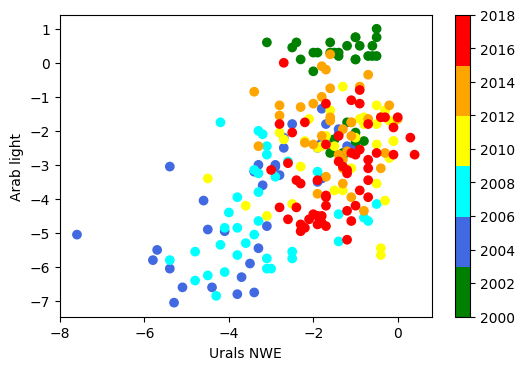

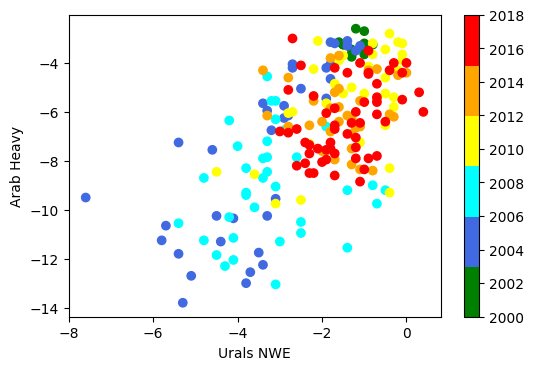

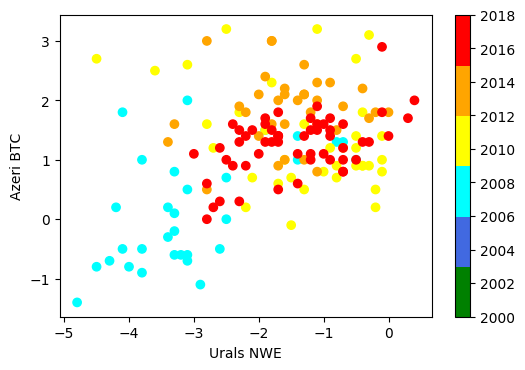

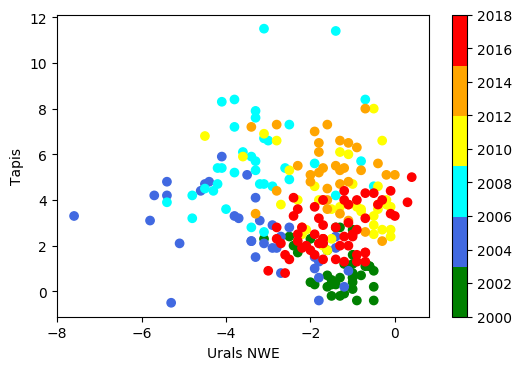

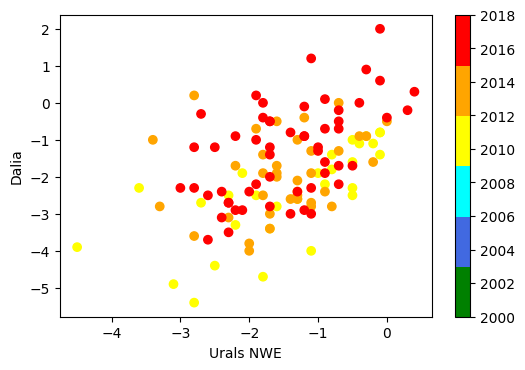

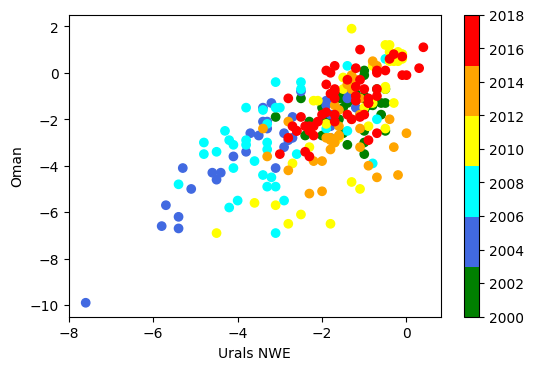

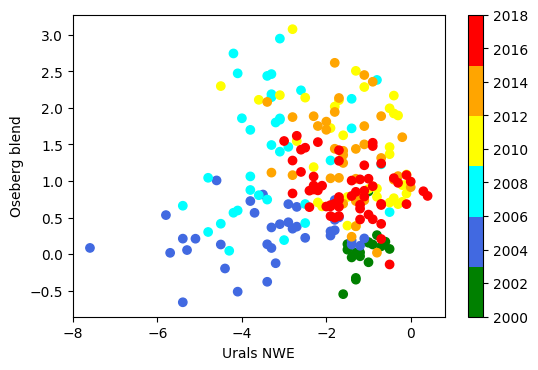

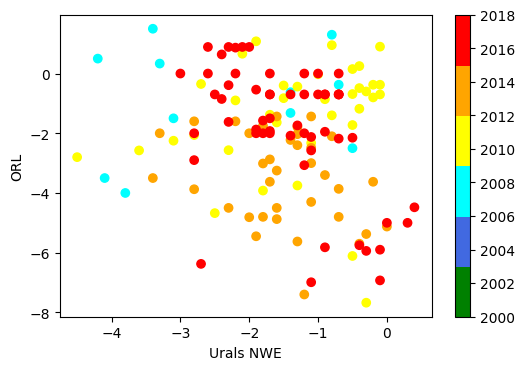

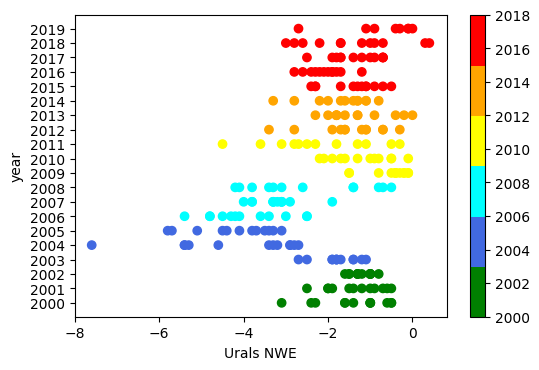

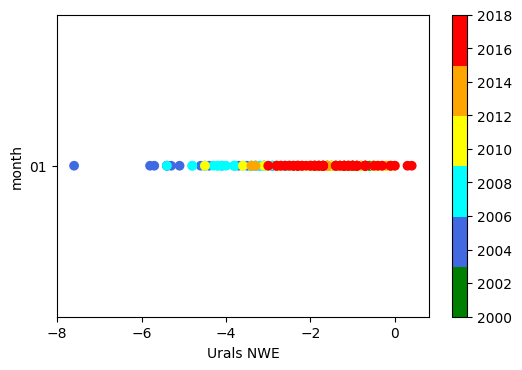

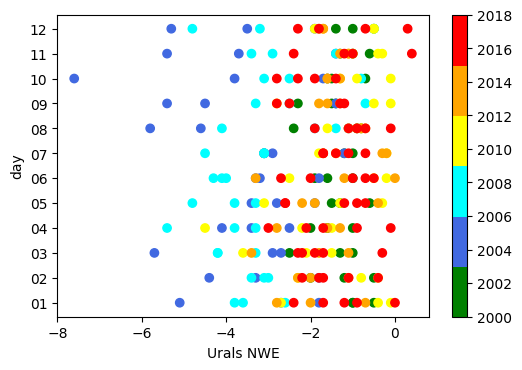

In [4]:
# plot all differentials to brent with no zeros
import matplotlib as mpl
import datetime
plt.rcParams['figure.dpi'] = 100
combi_nan["Date"] = pd.to_datetime(combi_nan.Date) 

combi_nan[['year','month','day']] = combi_nan.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))


cmap = mpl.colors.ListedColormap(['green','royalblue', 'cyan',
                                  'yellow', 'orange','red'])
cmap.set_over('red')
cmap.set_under('green')

bounds = [2000,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for column in combi_nan:
    plt.scatter(combi_nan["Urals NWE"],combi_nan[column],c=combi_nan["year"].astype(int),cmap = cmap)
    plt.xlabel('Urals NWE')
    plt.ylabel(column)
    plt.clim([2000,2018])
    plt.colorbar()
    plt.show()
    


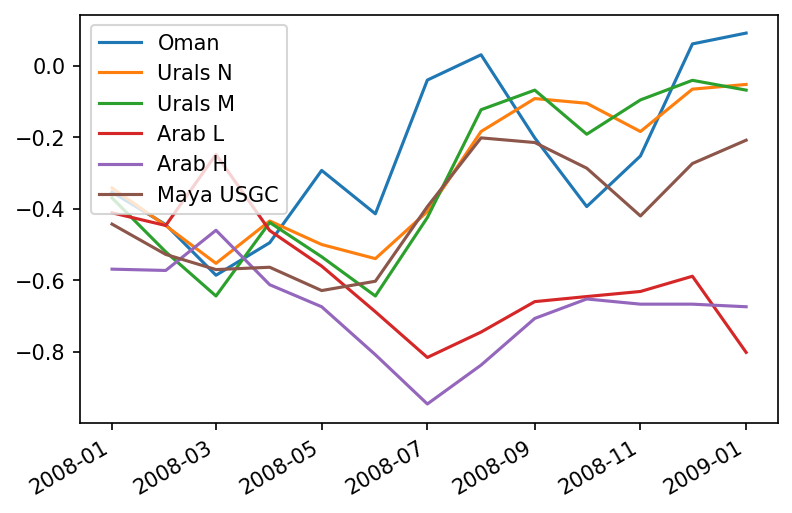

In [24]:
import matplotlib.dates as mdates
plt.rcParams['figure.dpi'] = 150 

ax1 =plt.plot(KK[96:109],combi["Oman"].iloc[96:109]/np.max(combi["Oman"]*-1))
plt.plot(KK[96:109],combi["Urals NWE"].iloc[96:109]/np.max(combi["Urals NWE"]*-1))
plt.plot(KK[96:109],combi["Urals MED"].iloc[96:109]/np.max(combi["Urals MED"]*-1))
plt.plot(KK[96:109],combi["Arab light"].iloc[96:109]/np.max(combi["Arab light"]*-1))
plt.plot(KK[96:109],combi["Arab Heavy"].iloc[96:109]/np.max(combi["Arab Heavy"]*-1))
plt.plot(KK[96:109],combi["Maya USGC"].iloc[96:109]/np.max(combi["Maya USGC"]*-1))
plt.legend(['Oman','Urals N','Urals M','Arab L','Arab H','Maya USGC'])
plt.gcf().autofmt_xdate()
plt.show()

            data
2015-07-01    28
2015-07-02    12
2015-07-03    46
2015-07-04    26
2015-07-05    78


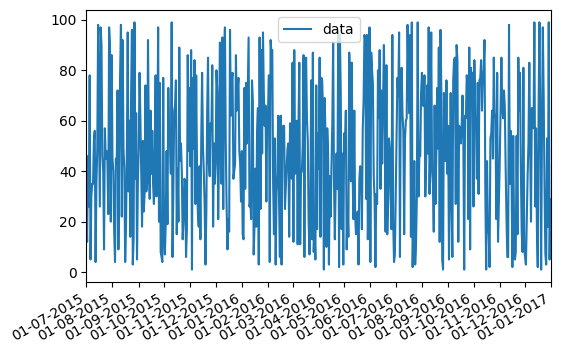

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

# convert date objects from pandas format to python datetime
index = pd.date_range(start = "2015-07-01", end = "2017-01-01", freq = "D")
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
data = np.random.randint(1,100, size=len(index))
df = pd.DataFrame(data=data,index=index, columns=['data'])
print (df.head())

ax = df.plot()
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.show()

In [7]:
K = pd.date_range(start = "2000-01-01", end = "2019-08-01", freq = "MS")

KK = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in K]
KK
len(KK)

236

In [5]:
dates = pd.DataFrame(combi["Date"])
dates
TT =pd.DatetimeIndex(dates['Date']).to_pydatetime().tolist()


In [62]:
dates = pd.DataFrame({'date': pd.DatetimeIndex(start='2017-01-01', end='2017-01-5', freq='D')})


pd.DatetimeIndex(dates['date']).to_pydatetime().tolist()
[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 3, 0, 0),
 datetime.datetime(2017, 1, 4, 0, 0),
 datetime.datetime(2017, 1, 5, 0, 0)]

Timestamp('2019-11-25 00:00:00')

In [3]:

X = combi[['FO 3.5%','Gasoil','FO 1%']]
Y = combi['Maya Europe']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

Intercept: 
 -0.375547531066462
Coefficients: 
 [ 0.0351987  -0.61141475  0.03749047]
                            OLS Regression Results                            
Dep. Variable:            Maya Europe   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     244.0
Date:                Fri, 01 Nov 2019   Prob (F-statistic):           1.85e-71
Time:                        15:18:54   Log-Likelihood:                -584.17
No. Observations:                 236   AIC:                             1176.
Df Residuals:                     232   BIC:                             1190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Maya Europe"]
    y=regr.predict([[db, m]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["FO 3.5%"].iloc[95:],combi["Maya Europe"].iloc[95:])
    ax1.scatter(db,y, s=200)
    k1= combi["FO 3.5%"]
    k2= combi["Gasoil"]
    ax2.scatter(combi["Maya Europe"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-20, -1])
    ax2.set_ylim([-20, -1])
    ax1.set_xlabel("FO 3.5%")
    ax1.set_ylabel("Maya Europe diff")
    ax2.set_xlabel("Historic Maya Europe diff")
    ax2.set_ylabel("Predicted Maya Europe diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Maya Europe is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-15,15,0.1), m=(-18, 18, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=15.0, min=-15.0), FloatSlider(value=0.0, de…

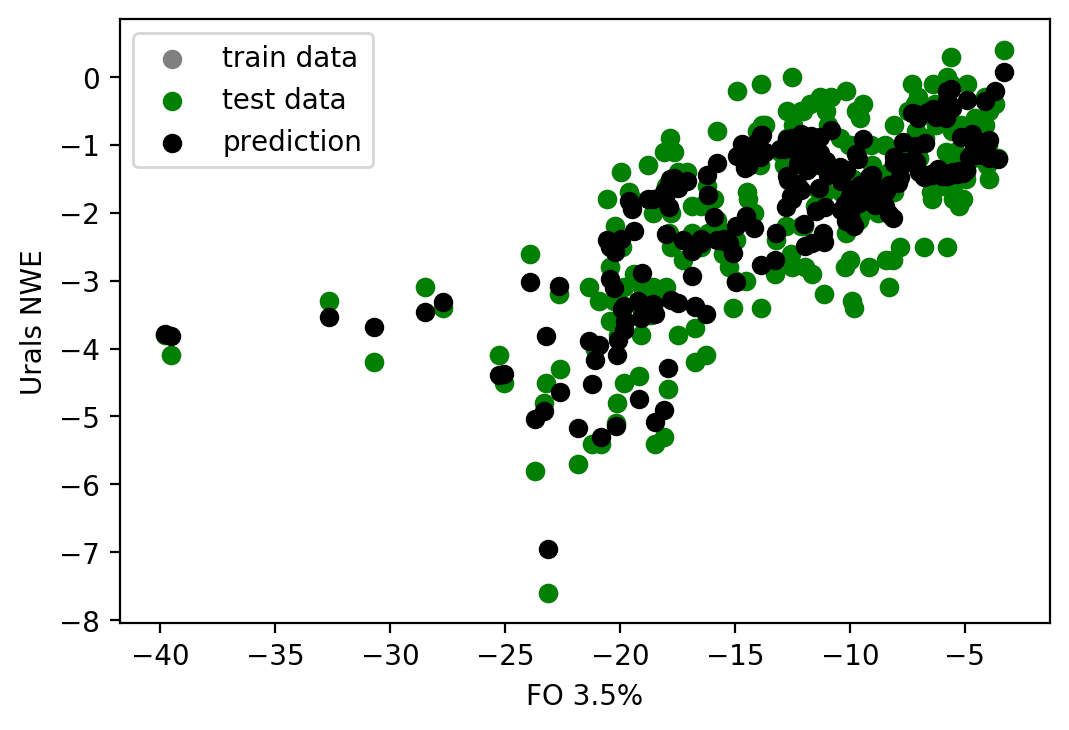

Mean squared error: 0.23
Feature ranking:
Feature Dated Brent (0.144343)
Feature Gasoil (0.164271)
Feature FO 3.5% (0.691386)


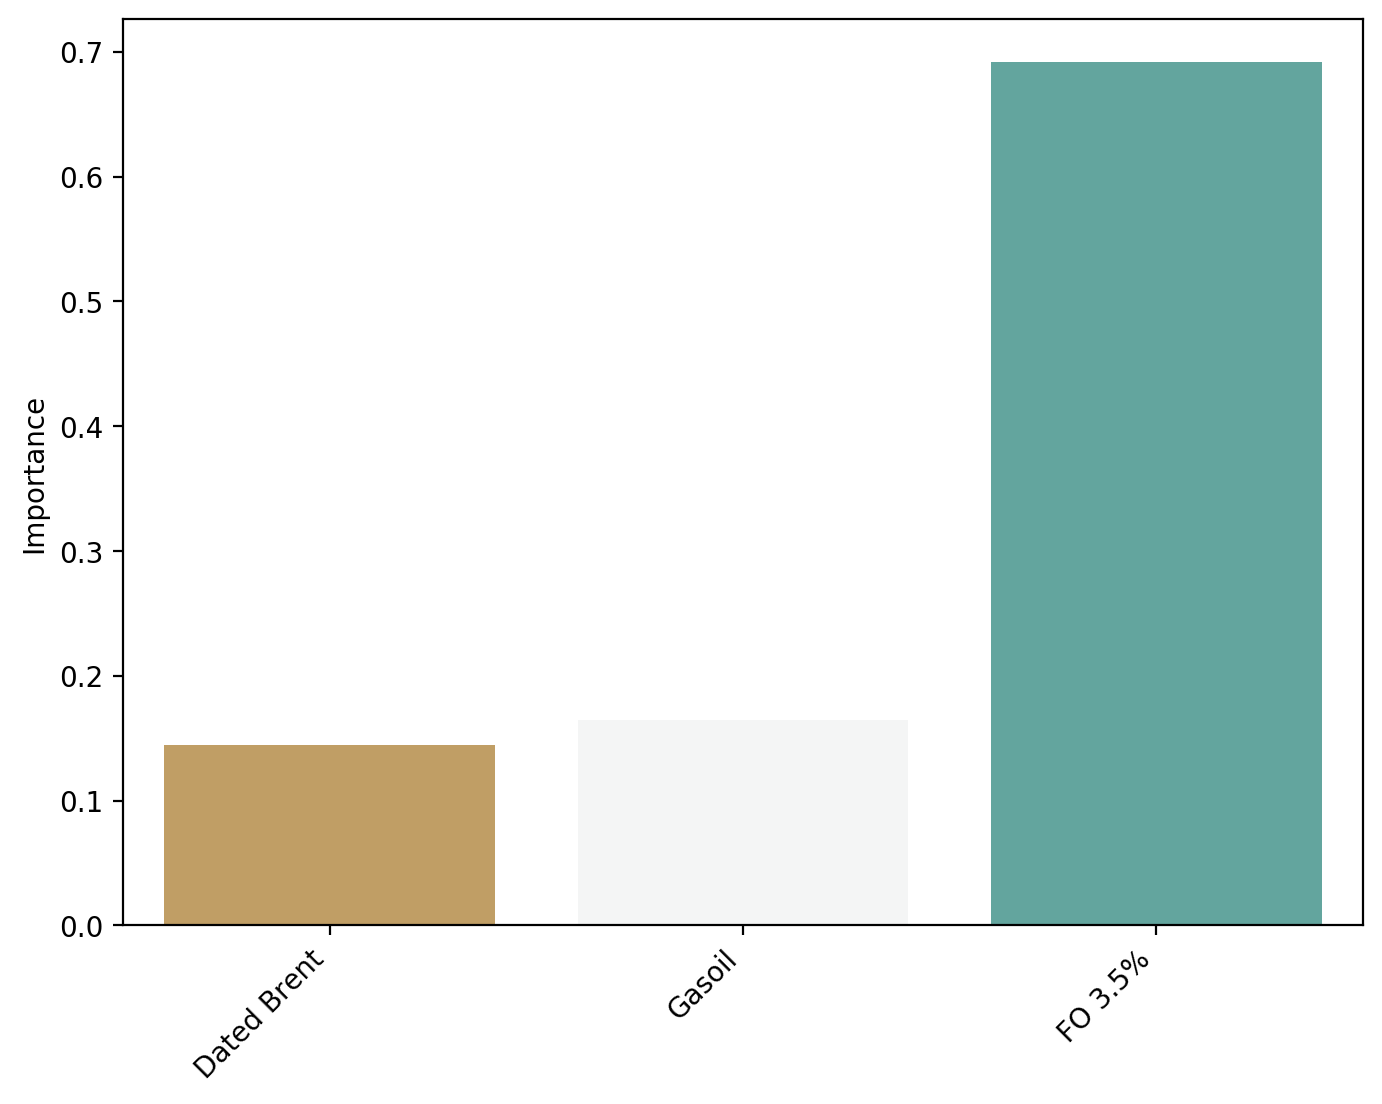

In [3]:
train_combi = combi.iloc[:,1:]
test_combi = combi.iloc[:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Oman",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Dated Brent","Propane","Butane","Gasoline","Jet","Gasoil"
#                                                   ,"FO 1%","ULSD","NAphtha","Butane","FO 3.5%","VGO 0.5%","FO 0.5%"
#                                                    ,"VGO 2%"])]
x_train=train_combi[["Dated Brent","Gasoil","FO 3.5%"]]
y_train=train_combi["Urals NWE"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Oman",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Dated Brent","Propane","Butane","Gasoline","Jet","Gasoil"
#                                                  ,"FO 1%","ULSD","NAphtha","Butane","FO 3.5%","VGO 0.5%","FO 0.5%"
#                                                    ,"VGO 2%"])]
x_test=test_combi[["Dated Brent","Gasoil","FO 3.5%"]]
y_test=test_combi["Urals NWE"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["FO 3.5%"],y_train,   color='grey')
plt_test=plt.scatter(x_test["FO 3.5%"],y_test,   color='green')
plt_pred=plt.scatter(x_test["FO 3.5%"], y_pred,  color='black')



plt.xlabel("FO 3.5%")
plt.ylabel("Urals NWE")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [95]:
#try PCA - it reduces dimensions (dimentionality) but doenst select features


features = ["FO 3.5%","Gasoil","Propane"]
x = combi.loc[:,features].values
y = combi.loc[:,['Urals NWE']].values
x = StandardScaler().fit_transform(x)

In [96]:
XX =pd.DataFrame(data = x, columns = features).head()
XX

FO 3.5%    Gasoil   Propane
0  1.045780 -1.067167  1.490717
1  0.842631 -1.067167  1.510755
2  1.351154 -1.067167  1.404075
3  1.320153 -1.067167  1.422242
4  0.518432 -1.067167  1.121768

In [97]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)


principal component 1  principal component 2
0              -2.096439              -0.111938
1              -2.013102               0.065964
2              -2.185319              -0.389676
3              -2.182330              -0.359770
4              -1.609068               0.273026

In [98]:
finalDf = pd.concat([principalDf, combi[['Urals NWE']]], axis = 1)
finalDf

principal component 1  principal component 2  Urals NWE
0                -2.096439              -0.111938       -0.5
1                -2.013102               0.065964       -0.5
2                -2.185319              -0.389676       -1.0
3                -2.182330              -0.359770       -1.0
4                -1.609068               0.273026       -0.6
..                     ...                    ...        ...
231               0.411451              -1.123128       -0.1
232               0.755945              -0.733105       -0.9
233               0.475414              -0.930342       -2.7
234               0.501014              -1.434544       -1.1
235               1.202494              -0.474869       -0.1

[236 rows x 3 columns]

In [99]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.6815055 , 0.24099934])

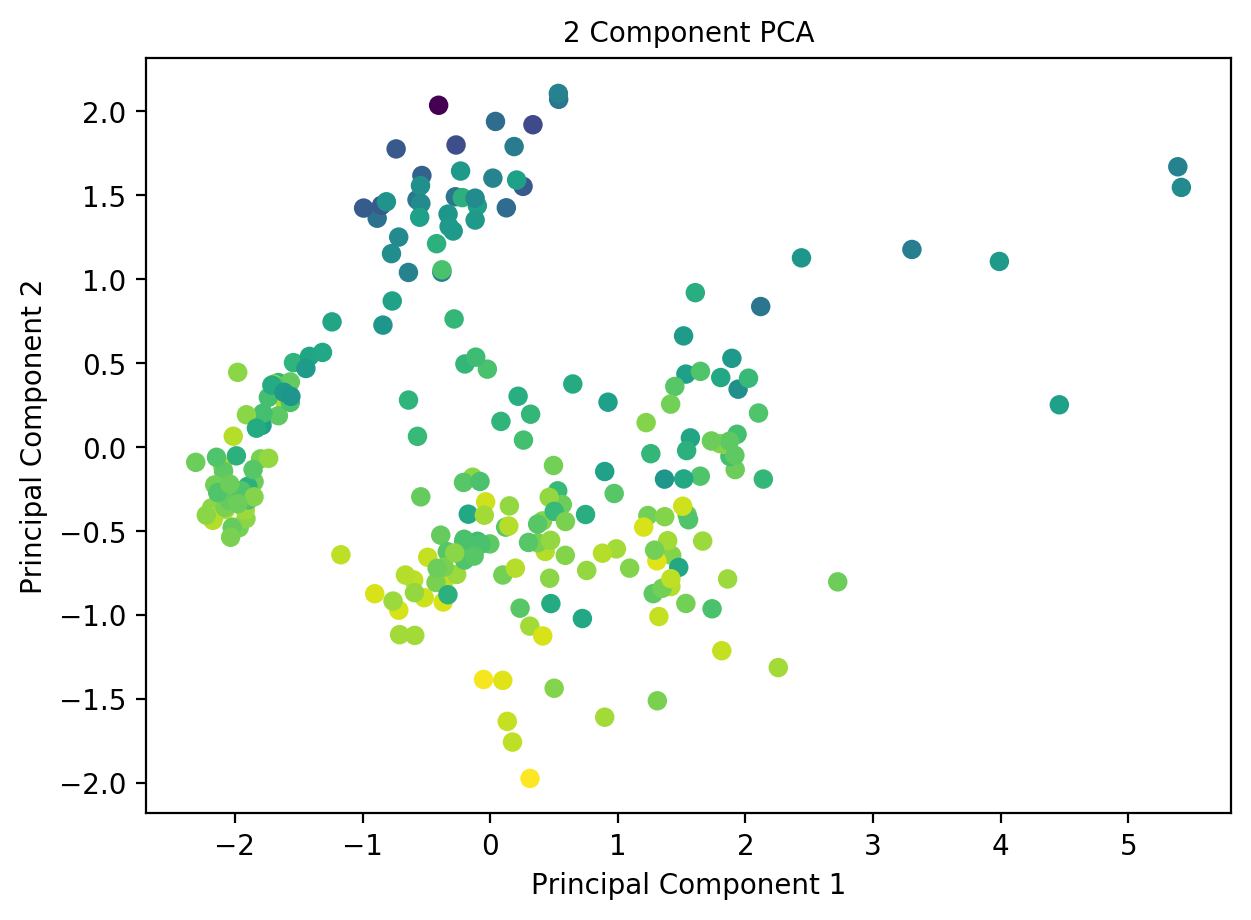

In [100]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 10)


ax.scatter(finalDf["principal component 1"],finalDf["principal component 2"], c=finalDf["Urals NWE"])


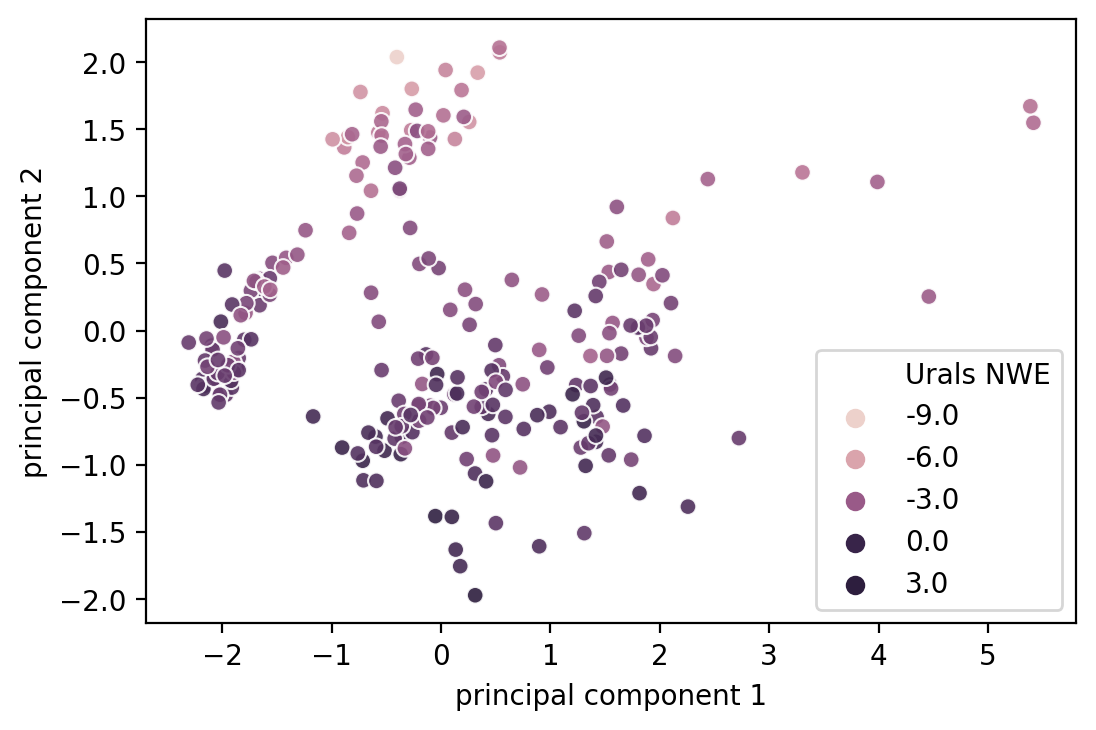

In [101]:
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="Urals NWE",
    data=finalDf,
    alpha=0.9
)

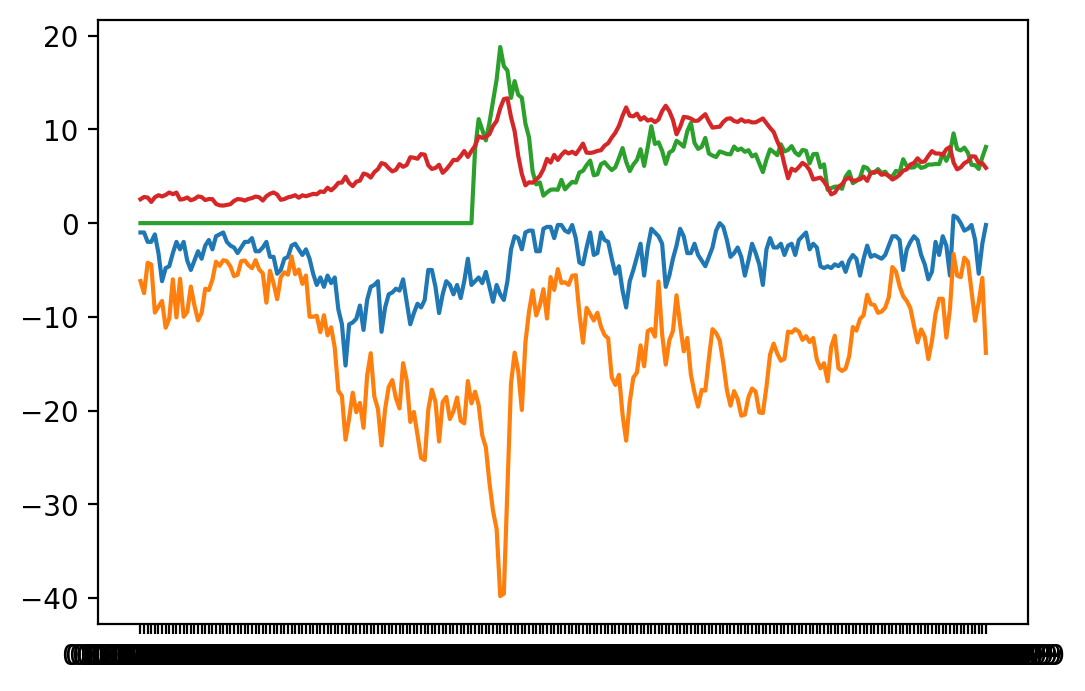

In [24]:
plt.plot(combi["Date"],combi["Urals NWE"]*2)
plt.plot(combi["Date"],combi["FO 3.5%"])
plt.plot(combi["Date"],combi["Gasoil"]/2)
plt.plot(combi["Date"],combi["Dated Brent"]/10)
#plt.plot(combi["Date"].iloc[116:],combi["Dubai"].iloc[116:])
#plt.plot(combi["Date"].iloc[116:],combi["ESPO"].iloc[116:])
plt.show()

In [47]:
from sklearn import tree
from sklearn import preprocessing
fruit_classifier = tree.DecisionTreeClassifier()

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

fruit_classifier.fit(x_train, training_scores_encoded)

with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(fruit_classifier, out_file=f)

In [78]:
#How to input data into trained model 

data =  {'Dated Brent':[64.89],'Jet':[15.53],'VGO 2%':[4.7],'ULSD':[15.38]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[-3.0786322]


In [28]:
pred_mayaE = combi["Dubai"] + 0.397436545016001*(combi["FO 3.5%"]) + 0.000372657746925089*combi["Dubai"]*np.power(combi["FO 3.5%"],2) - 3.89483828551919 - 0.0101406372095834*np.power(combi["Dubai"],4) - 0.0903722928130744*np.power(combi["Dubai"],3)

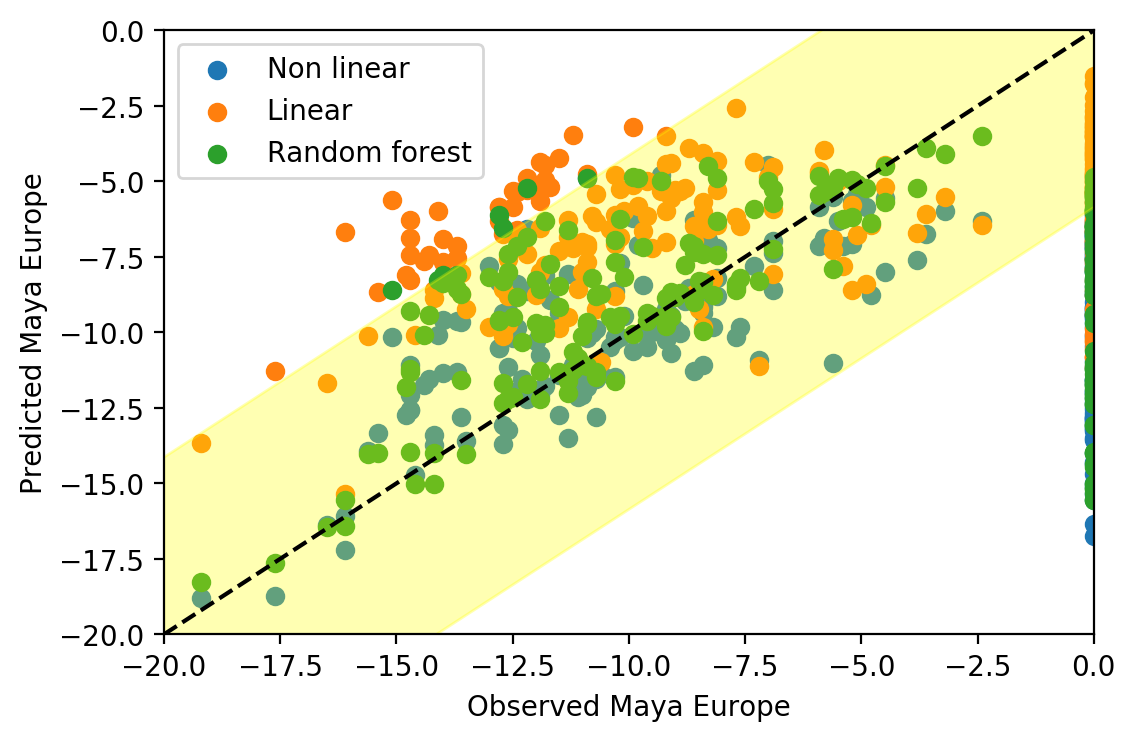

In [48]:
plt.rcParams['figure.dpi'] = 200
k1= combi["Dubai"]
k2= combi["FO 3.5%"]
linear_mayaE = regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2
plt_nl=plt.scatter(combi["Maya Europe"],pred_mayaE)
plt_l =plt.scatter(combi["Maya Europe"],linear_mayaE)



x_all=combi[["Dubai","FO 3.5%"]] 
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Maya Europe"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Maya Europe"]), pop_mean-np.std(combi["Maya Europe"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Maya Europe')
plt.ylabel('Predicted Maya Europe')
plt.xlim([-20, 0])
plt.ylim([-20, 0])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [28]:
Pred_Ose = 0.011666686468756*combi["Dated Brent"]+ 3.67495911112595e-7*np.power(combi["Dated Brent"],3)

Text(0, 0.5, 'Oseberg blend')

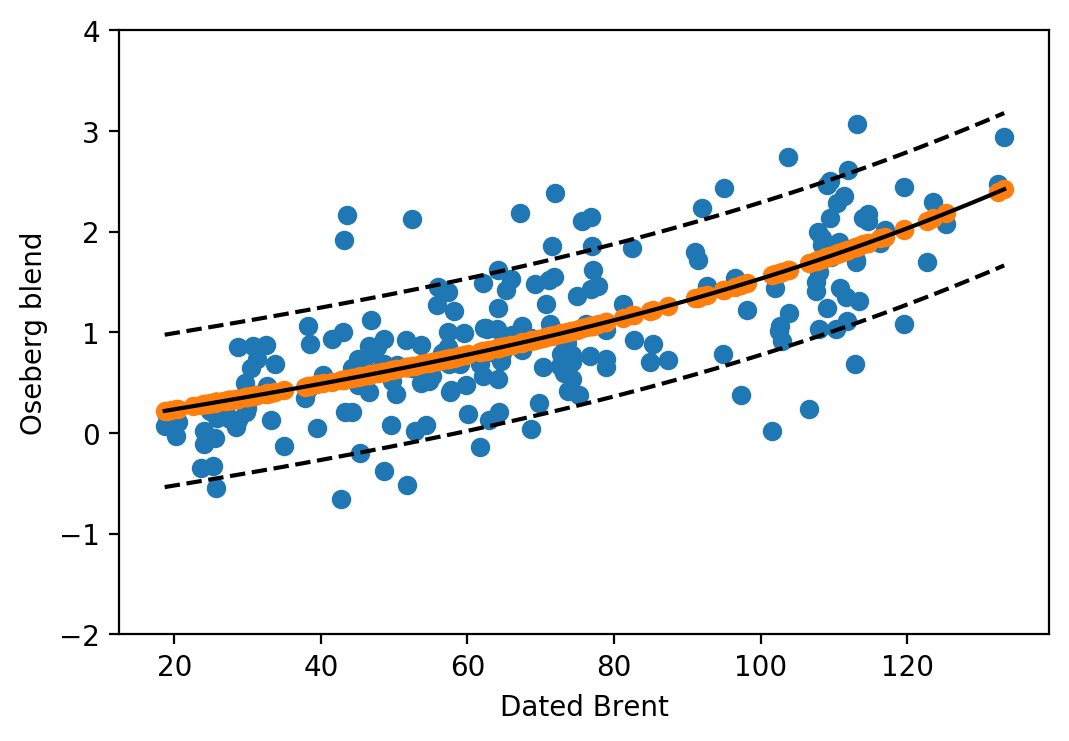

In [29]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dated Brent"].iloc[20:],combi["Oseberg blend"].iloc[20:])
plt.scatter(combi["Dated Brent"],Pred_Ose)
plt.ylim([-2 ,4])

DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)



P_Ose = 0.011666686468756*(DB) + 3.67495911112595e-7*np.power(DB,3)




plt.plot(DB,P_Ose,'k')
plt.plot(DB,P_Ose+np.std(combi["Oseberg blend"]),'--k')
plt.plot(DB,P_Ose-np.std(combi["Oseberg blend"]),'--k')
plt.xlabel('Dated Brent')
plt.ylabel('Oseberg blend')

In [75]:
Pred_Dalia = 0.239431509820856*(combi["FO 1%"]) + 0.00159358124012133*(combi["Dated Brent"])*(combi["FO 1%"])
+ 0.000155571867417853*(combi["Dated Brent"])*(combi["FO 1%"])**2

0      0.034640
1      0.045680
2      0.024502
3      0.007728
4      0.082530
         ...   
231    0.245107
232    0.255535
233    0.004369
234    0.029838
235    0.000433
Length: 236, dtype: float64

Text(0, 0.5, 'Dalia')

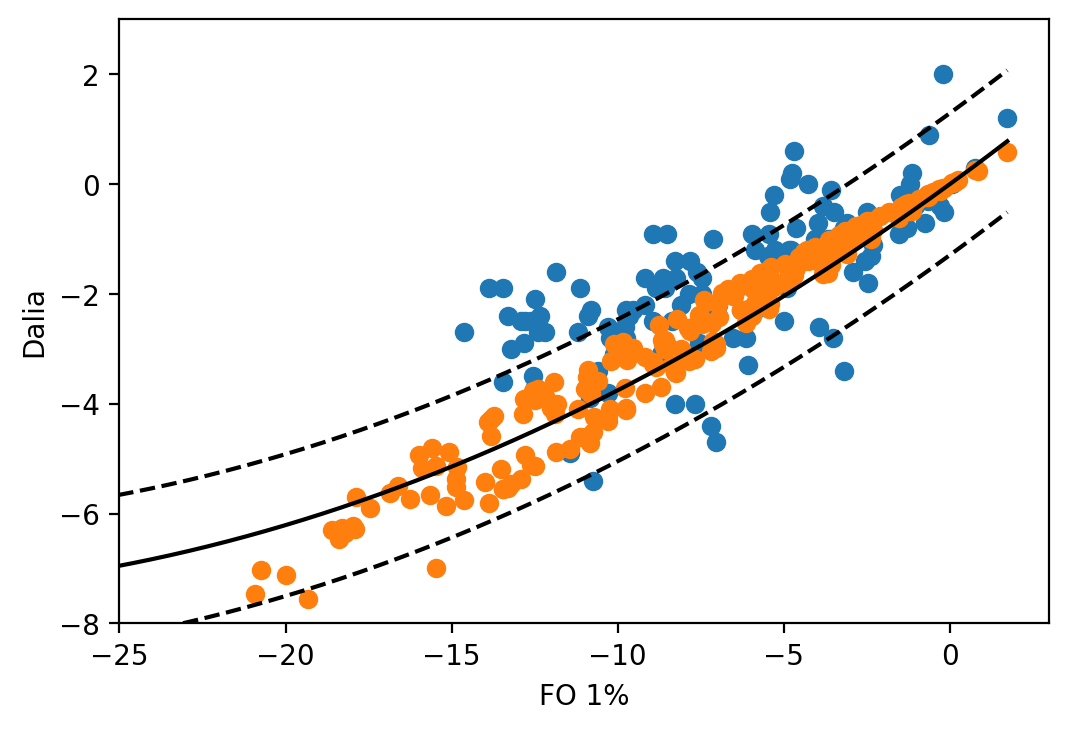

In [76]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 1%"].iloc[116:],combi["Dalia"].iloc[116::])
plt.scatter(combi["FO 1%"],Pred_Dalia)
plt.ylim([-8 ,3])
plt.xlim([-25 ,3])

FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)
DB =  np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)


P_Dalia = 0.239431509820856*(FO1) + 0.00159358124012133*(DB)*(FO1)
+ 0.000155571867417853*(DB)*(FO1)**2

plt.plot(FO1,P_Dalia,'k')

plt.plot(FO1,P_Dalia+np.std(combi["Dalia"]),'--k')
plt.plot(FO1,P_Dalia-np.std(combi["Dalia"]),'--k')
plt.xlabel('FO 1%')
plt.ylabel('Dalia')

In [ ]:
Pred_ORL =  3.26973453707456e-6*combi["Naphtha"]*combi["Butane"]*combi["Propane"]**2 - 0.314833608268645 - 0.0162685919989057*combi["Naphtha"]*combi["Butane"]

Text(0, 0.5, 'ORL')

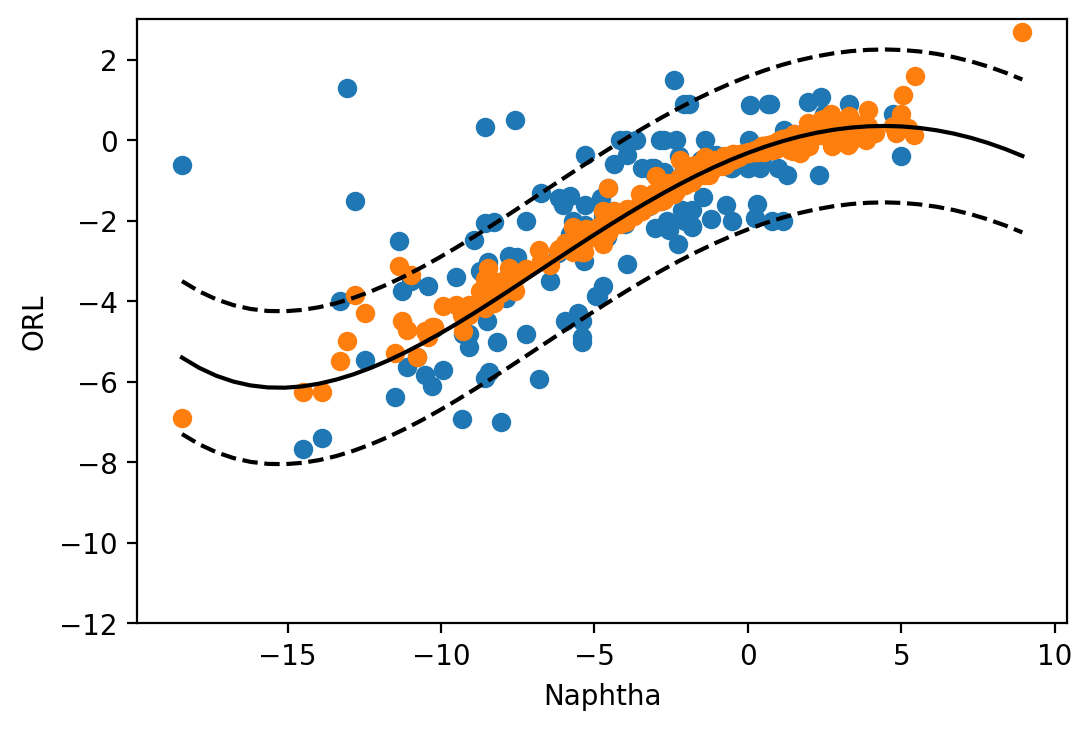

In [44]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Naphtha"].iloc[95:],combi["ORL"].iloc[95:])
plt.scatter(combi["Naphtha"],Pred_ORL)
plt.ylim([-12 ,3])

Na = np.linspace(np.min(combi["Naphtha"]),np.max(combi["Naphtha"]),50)
Bu = np.linspace(np.min(combi["Butane"]),np.max(combi["Butane"]),50)
Po = np.linspace(np.min(combi["Propane"]),np.max(combi["Propane"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
Jet=Jet[::-1]


P_ORL =   3.26973453707456e-6*Na*Bu*Po**2 - 0.314833608268645 - 0.0162685919989057*Na*Bu




plt.plot(Na,P_ORL,'k')
plt.plot(Na,P_ORL+np.std(combi["ORL"]),'--k')
plt.plot(Na,P_ORL-np.std(combi["ORL"]),'--k')
plt.xlabel('Naphtha')
plt.ylabel('ORL')

In [ ]:
pred_MayaE = 0.494070816929047*(combi["FO 3.5%"]) + 0.00213078770640727*combi["Gasoil"]**2 - 4.30356291903192


Text(0, 0.5, 'Maya Europe')

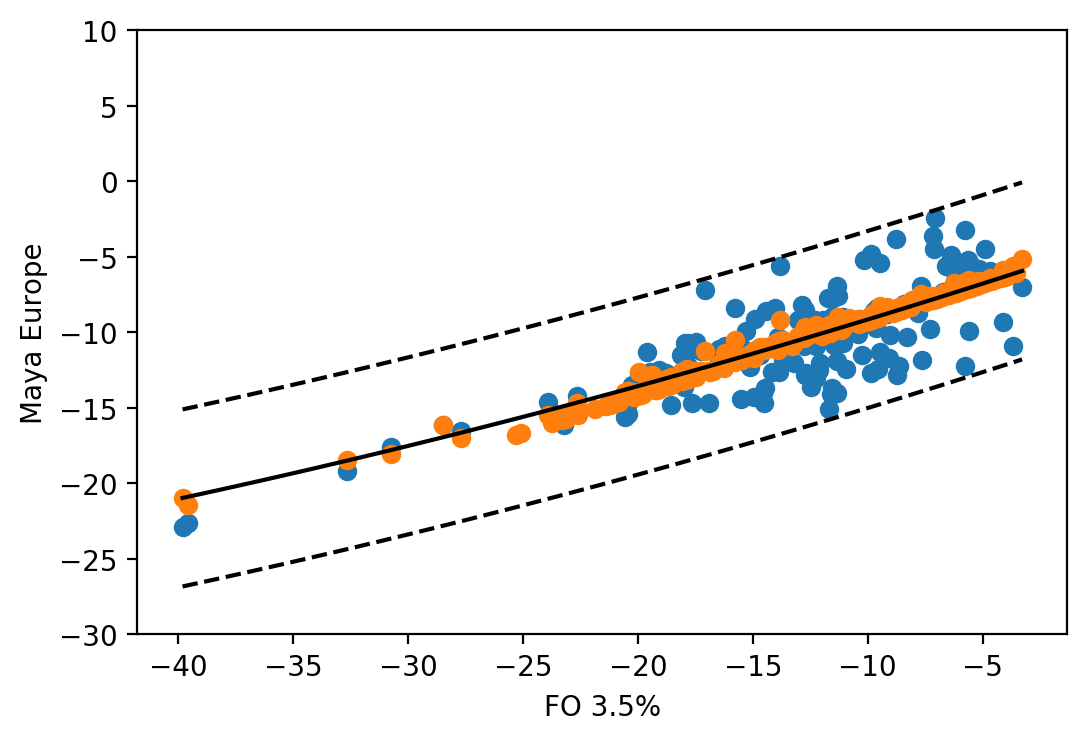

In [46]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"].iloc[95:],combi["Maya Europe"].iloc[95:])
plt.scatter(combi["FO 3.5%"],pred_MayaE)
plt.ylim([-30 ,10])

Go = np.linspace(np.min(combi["Gasoil"]),np.max(combi["Gasoil"]),50)
FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Go=Go[::-1]

P_MayaE = 0.494070816929047*(FO35) + 0.00213078770640727*Go**2 - 4.30356291903192


plt.plot(FO35,P_MayaE,'k')
plt.plot(FO35,P_MayaE+np.std(combi["Maya Europe"]),'--k')
plt.plot(FO35,P_MayaE-np.std(combi["Maya Europe"]),'--k')
plt.xlabel('FO 3.5%')
plt.ylabel('Maya Europe')

Text(0, 0.5, 'Maya Europe')

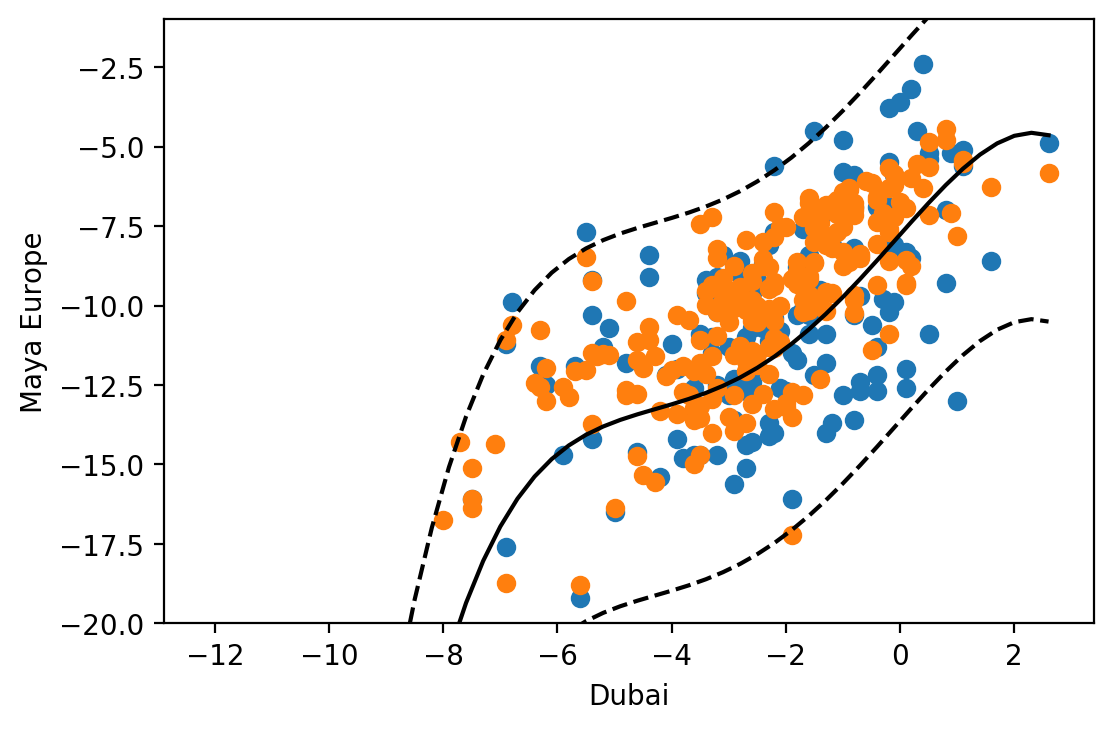

In [68]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dubai"],combi["Maya Europe"])
plt.scatter(combi["Dubai"],pred_mayaE)
plt.ylim([-20 ,-1])

Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)
FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)


P_mayaE = Du + 0.397436545016001*(FO35) + 0.000372657746925089*Du*np.power(FO35,2) - 3.89483828551919 - 0.0101406372095834*np.power(Du,4) - 0.0903722928130744*np.power(Du,3)

plt.plot(Du,P_mayaE,'k')
plt.plot(Du,P_mayaE+np.std(combi["Maya Europe"]),'--k')
plt.plot(Du,P_mayaE-np.std(combi["Maya Europe"]),'--k')

plt.xlabel('Dubai')
plt.ylabel('Maya Europe')

In [3]:
pred_ESPO = 11.3890705439685 + 0.199142482697583*np.power(combi["Gasoil"],2) + 0.00184730192306026*combi["Dubai"]*np.power(combi["Gasoil"],2) - 2.57509779249408*combi["Gasoil"] - 0.00455818401805749*np.power(combi["Gasoil"],3) - 0.0333384283920602*np.power(combi["Dubai"],2)


Text(0, 0.5, 'ESPO')

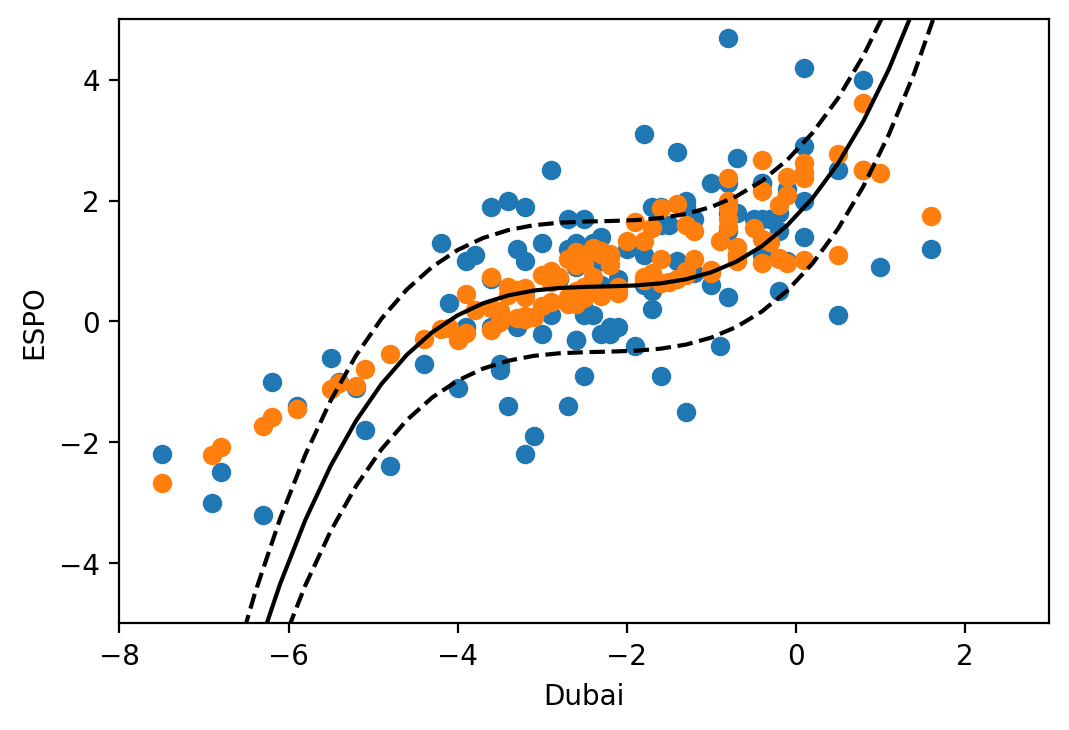

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dubai"].iloc[120:],combi["ESPO"].iloc[120:])
plt.scatter(combi["Dubai"].iloc[120:],pred_ESPO.iloc[120:])
plt.xlim([-8 ,3])
plt.ylim([-5 ,5])

Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)
Go = np.linspace(np.min(combi["Gasoil"]),np.max(combi["Gasoil"]),50)
URM = np.linspace(np.min(combi["Urals MED"]),np.max(combi["Urals MED"]),50)
Du=Du[::-1]

P_ESPO = 11.3890705439685 + 0.199142482697583*np.power(Go,2) + 0.00184730192306026*Du*np.power(Go,2) - 2.57509779249408*Go - 0.00455818401805749*np.power(Go,3) - 0.0333384283920602*np.power(Du,2)



plt.plot(Du,P_ESPO,'k')
plt.plot(Du,P_ESPO+np.std(combi["ESPO"]),'--k')
plt.plot(Du,P_ESPO-np.std(combi["ESPO"]),'--k')

plt.xlabel('Dubai')
plt.ylabel('ESPO')

In [27]:
Du = -0.51
Go = 14.16
URM = -0.1

P_ESPO = 11.3890705439685 + 0.199142482697583*np.power(Go,2) + 0.00184730192306026*Du*np.power(Go,2) - 2.57509779249408*Go - 0.00455818401805749*np.power(Go,3) - 0.0333384283920602*np.power(Du,2)

print(P_ESPO)

1.7158857940126762


In [29]:

X = combi[['Dubai','Gasoil','Urals MED']]
Y = combi['ESPO']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

New_Du = -0.51
New_Gasoil = 14.16
New_URM = -0.1
print ('Predicted Mars: \n', regr.predict([[New_Du, New_Gasoil, New_URM]]))

Intercept: 
 0.7194202550036548
Coefficients: 
 [0.2054775  0.02487161 0.04401825]
                            OLS Regression Results                            
Dep. Variable:                   ESPO   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     23.85
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.73e-13
Time:                        13:38:50   Log-Likelihood:                -321.59
No. Observations:                 236   AIC:                             651.2
Df Residuals:                     232   BIC:                             665.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Arab Heavy"]
    y=regr.predict([[db]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["Arab Heavy"],combi["Arab light"])
    ax1.scatter(db,y, s=200)
    k1= combi["Arab Heavy"]
 
    ax2.scatter(combi["Arab light"], regr.intercept_+ regr.coef_[0]*k1  )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-8 , 0])
    ax2.set_ylim([-8, 0])
    ax1.set_xlabel("Arab Heavy")
    ax1.set_ylabel("Arab light diff")
    ax2.set_xlabel("Historic Arab light diff")
    ax2.set_ylabel("Predicted Arab light diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Maya Europe is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-5,5,0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=5.0, min=-5.0), Output(layout=Layout(height…

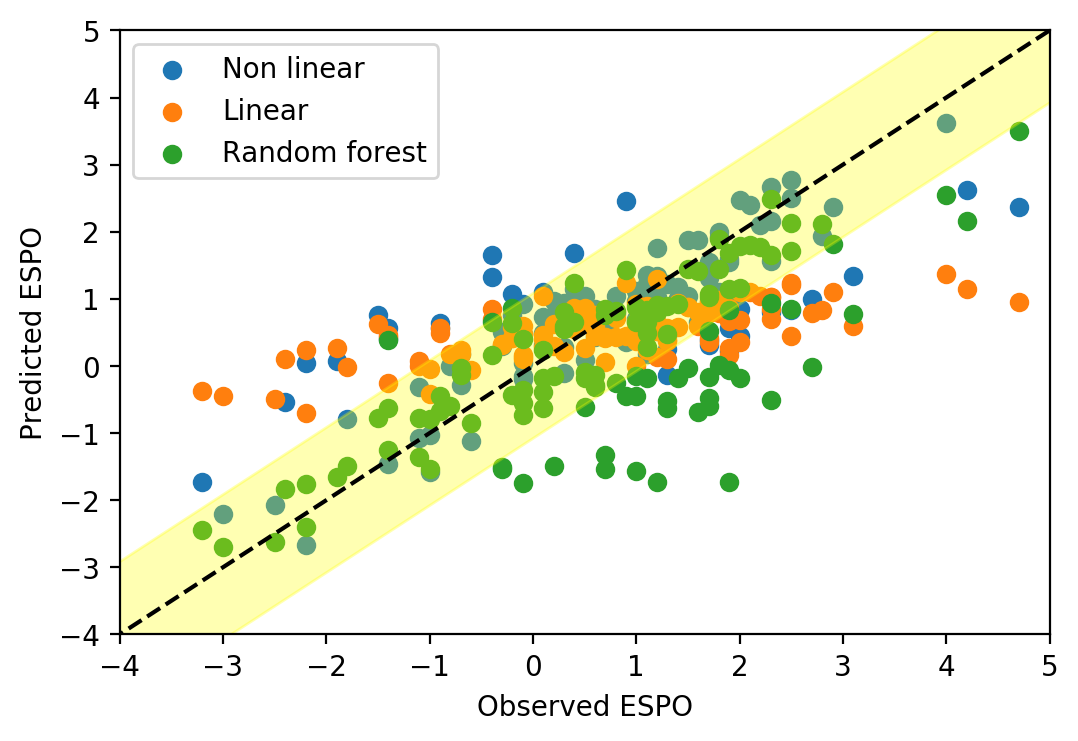

In [41]:
plt.rcParams['figure.dpi'] = 200
k1= combi["Dubai"].iloc[120:]
k2= combi["Gasoil"].iloc[120:]
k3= combi["Urals NWE"].iloc[120:]
linear_ESPO = regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3
plt_nl=plt.scatter(combi["ESPO"].iloc[120:],pred_ESPO.iloc[120:])
plt_l =plt.scatter(combi["ESPO"].iloc[120:],linear_ESPO)



x_all=combi[["Dubai","Gasoil","Urals NWE"]].iloc[120:]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["ESPO"].iloc[120:],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["ESPO"]), pop_mean-np.std(combi["ESPO"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed ESPO')
plt.ylabel('Predicted ESPO')
plt.xlim([-4, 5])
plt.ylim([-4, 5])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [59]:
pred_Mars = 0.00533572984584189*combi["Jet"] + 0.00232258205864726*combi["Jet"]**2 - 5.0468498330526 - 0.379625720730507*(combi["FO 3.5%"]) - 0.000535344925798245*(combi["FO 3.5%"])**3 - 0.0324550409045776*(combi["FO 3.5%"])**2


Text(0, 0.5, 'Mars')

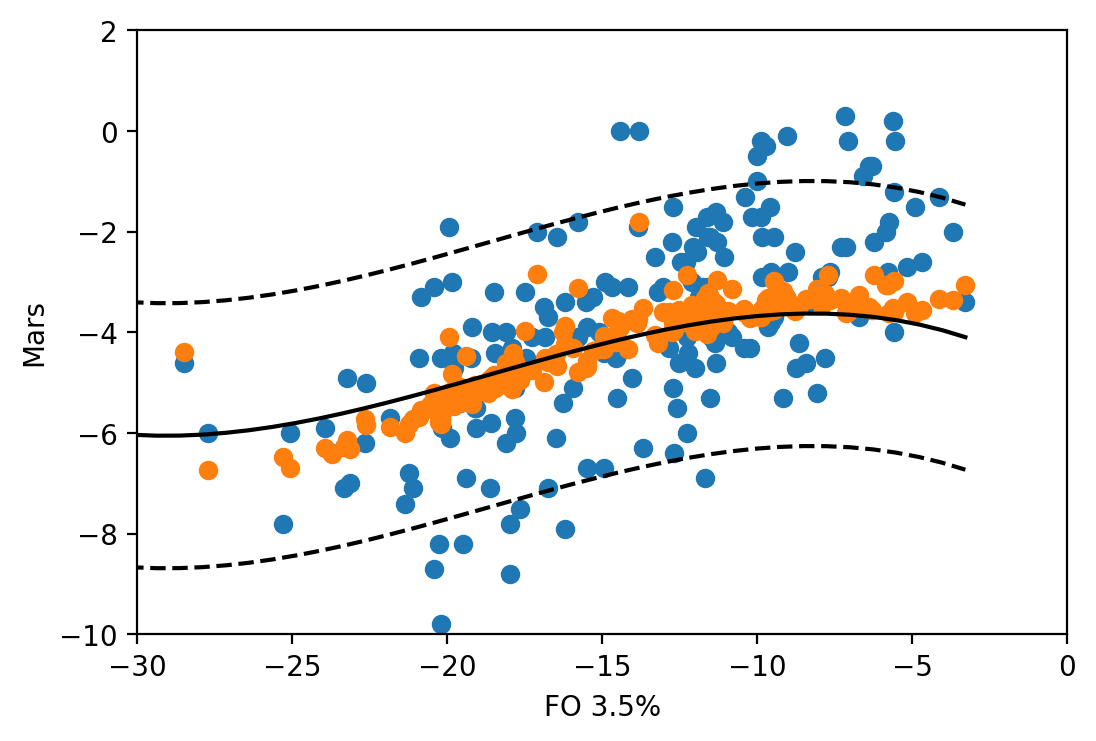

In [62]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"].iloc[46:],combi["Mars"].iloc[46:])
plt.scatter(combi["FO 3.5%"].iloc[46:],pred_Mars.iloc[46:])
plt.xlim([-30 ,0])
plt.ylim([-10 ,2])


Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)

FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Jet=Jet[::-1]


P_Mars = 0.00533572984584189*Jet + 0.00232258205864726*Jet**2 - 5.0468498330526 - 0.379625720730507*(FO35) - 0.000535344925798245*(FO35)**3 - 0.0324550409045776*(FO35)**2


plt.plot(FO35,P_Mars,'k')
plt.plot(FO35,P_Mars+np.std(combi["Mars"]),'--k')
plt.plot(FO35,P_Mars-np.std(combi["Mars"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Mars')

In [ ]:
pred_Mars =-1.64696713946646 - 0.0220607646182852*(combi["Maya USGC"])*combi["FO 3.5%"] - 0.000212150983747174*np.power(combi["FO 3.5%"],3) - 0.000238111245249621*np.power(combi["Maya USGC"],3)

Text(0, 0.5, 'Mars')

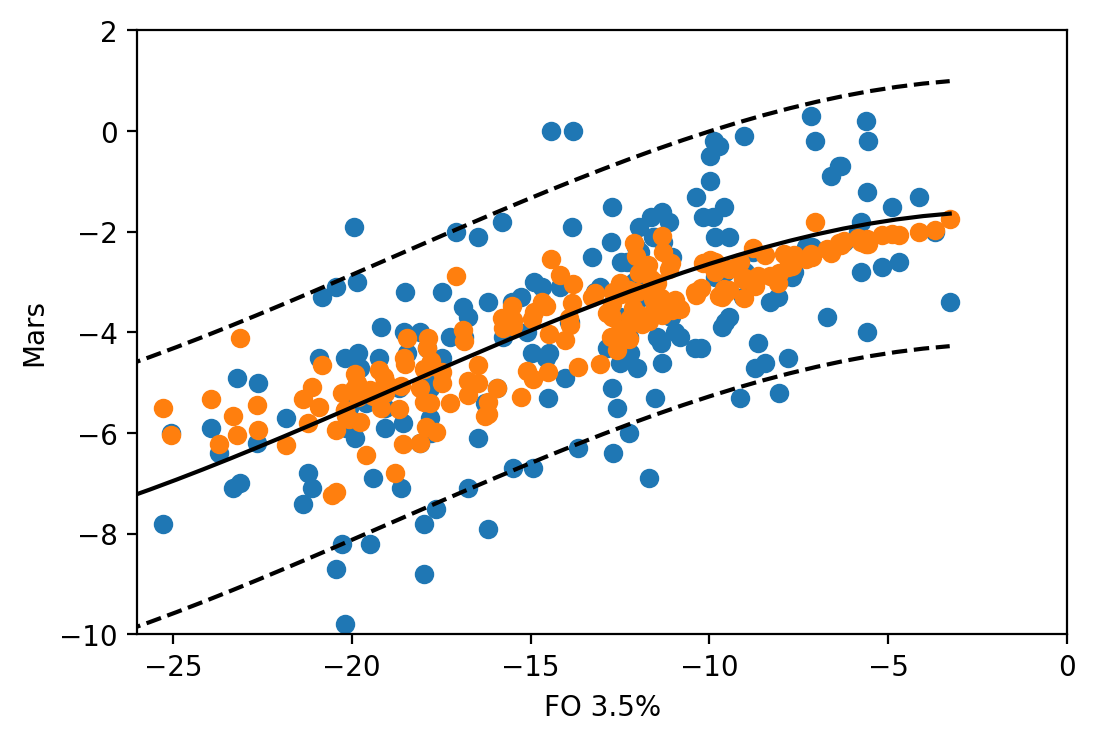

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"].iloc[46:],combi["Mars"].iloc[46:])
plt.scatter(combi["FO 3.5%"].iloc[46:],pred_Mars.iloc[46:])
plt.xlim([-26 ,0])
plt.ylim([-10 ,2])

MU = np.linspace(np.min(combi["Maya USGC"]),np.max(combi["Maya USGC"]),50)

FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)


P_Mars =-1.64696713946646 - 0.0220607646182852*(MU)*FO35 - 0.000212150983747174*np.power(FO35,3) - 0.000238111245249621*np.power(MU,3)

plt.plot(FO35,P_Mars,'k')
plt.plot(FO35,P_Mars+np.std(combi["Mars"]),'--k')
plt.plot(FO35,P_Mars-np.std(combi["Mars"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Mars')

In [55]:
MU = -5.67

FO35 = -7.42


P_Mars =-1.64696713946646 - 0.0220607646182852*(MU)*FO35 - 0.000212150983747174*np.power(FO35,3) - 0.000238111245249621*np.power(MU,3)
print(P_Mars)

-2.4450228600677364


In [ ]:
train_combi = combi.iloc[:100,1:]
test_combi = combi.iloc[-100:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dated Brent","Butane", "VGO 0.5%"]]
y_train=train_combi["WTI"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dated Brent","Butane", "VGO 0.5%"]]
y_test=test_combi["WTI"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("WTI")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [43]:

data =  {'Dated Brent':[64.89],'Jet':[15.53]}
data_df = pd.DataFrame(data)
y_pred=regressor.predict(data_df)
print(y_pred)

[4.76503583]


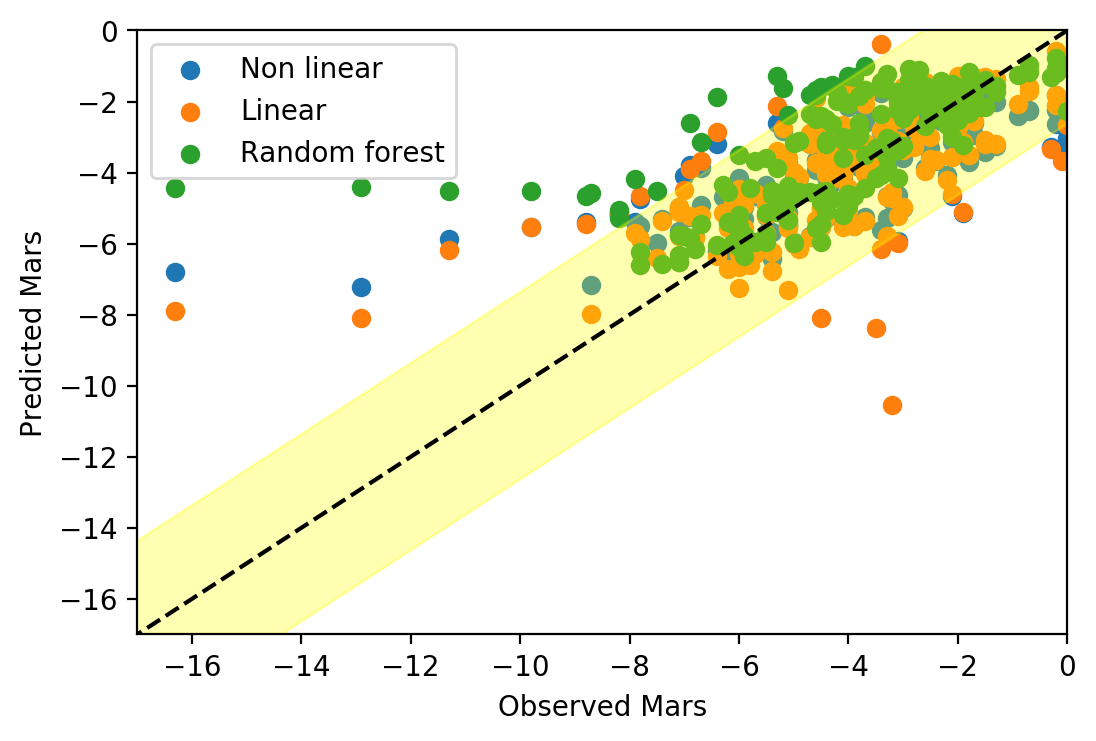

In [13]:
plt.rcParams['figure.dpi'] = 200
k1= combi["Maya USGC"].iloc[50:]
k2= combi["FO 3.5%"].iloc[50:]
linear_mars = regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2
plt_nl=plt.scatter(combi["Mars"].iloc[50:],pred_Mars.iloc[50:])
plt_l =plt.scatter(combi["Mars"].iloc[50:],linear_mars)



x_all=combi[["Maya USGC","FO 3.5%","FO 1%"]].iloc[50:]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Mars"].iloc[50:],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Mars"]), pop_mean-np.std(combi["Mars"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Mars')
plt.ylabel('Predicted Mars')
plt.xlim([-17, 0])
plt.ylim([-17, 0])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [15]:
Pred_UralN = 0.221579893076645*(combi["FO 3.5%"]) + 0.0169570894526404*(combi["Dated Brent"]) - 0.0154492977171762 - 0.0697233738254049*combi["Gasoil"] - 0.00856228790867718*combi["Gasoil"]*(combi["FO 3.5%"]) - 0.00421761896551571*(combi["FO 3.5%"])**2

Text(0, 0.5, 'Urals NWE')

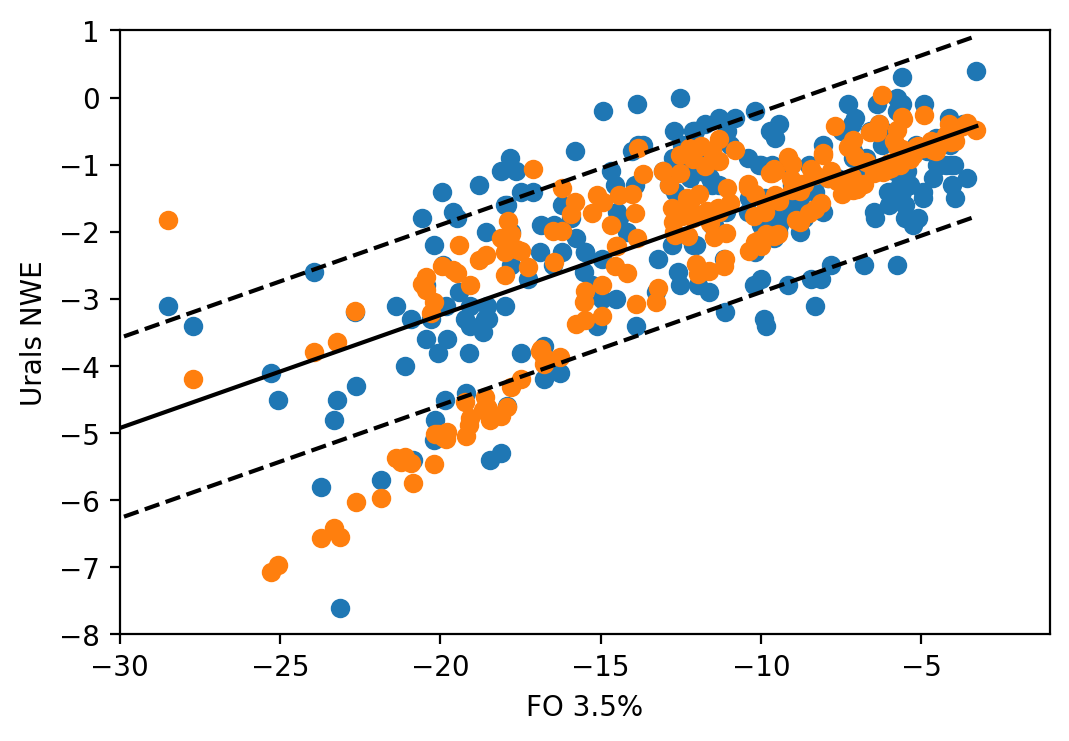

In [17]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"],combi["Urals NWE"])
plt.scatter(combi["FO 3.5%"],Pred_UralN)
#plt.scatter(combi["FO 3.5%"],pred_UralN3)
plt.xlim([-30 ,-1])
plt.ylim([-8 ,1])



FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Go = np.linspace(np.min(combi["Gasoil"]),np.max(combi["Gasoil"]),50)
DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)

DB=DB[::-1]

P_UralN3 = 0.221579893076645*(FO35) + 0.0169570894526404*(DB) - 0.0154492977171762 
- 0.0697233738254049*Go - 0.00856228790867718*Go*(FO35) - 0.00421761896551571*(FO35)**2

#plt.plot(FO35,P_UralN,'k')
plt.plot(FO35,P_UralN3,'k')
plt.plot(FO35,P_UralN3+np.std(combi["Urals NWE"]),'--k')
plt.plot(FO35,P_UralN3-np.std(combi["Urals NWE"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Urals NWE')

In [ ]:
pred_UralN =  0.283335353802878*combi["Dubai"] + 0.0438064617068955*combi["FO 3.5%"] + 0.00320839301327694*combi["Dubai"]*np.power(combi["FO 1%"],2) - 0.511831158401274 - 0.00194313007342261*combi["Dubai"]*combi["FO 3.5%"]*combi["FO 1%"]

In [3]:
pred_UralN2 = 0.243310947652501*(combi["FO 3.5%"]) + 0.0327070285007665*(combi["Dated Brent"]) + 0.000931100809264595*np.power(combi["FO 1%"],3) + 3.01672677408283e-5*np.power(combi["FO 1%"],4) - 0.771156577782479 - 0.00241982760220774*(combi["Dated Brent"])*(combi["FO 1%"]) - 0.000191940652210639*np.power(combi["Dated Brent"],2)

Text(0, 0.5, 'Urals NWE')

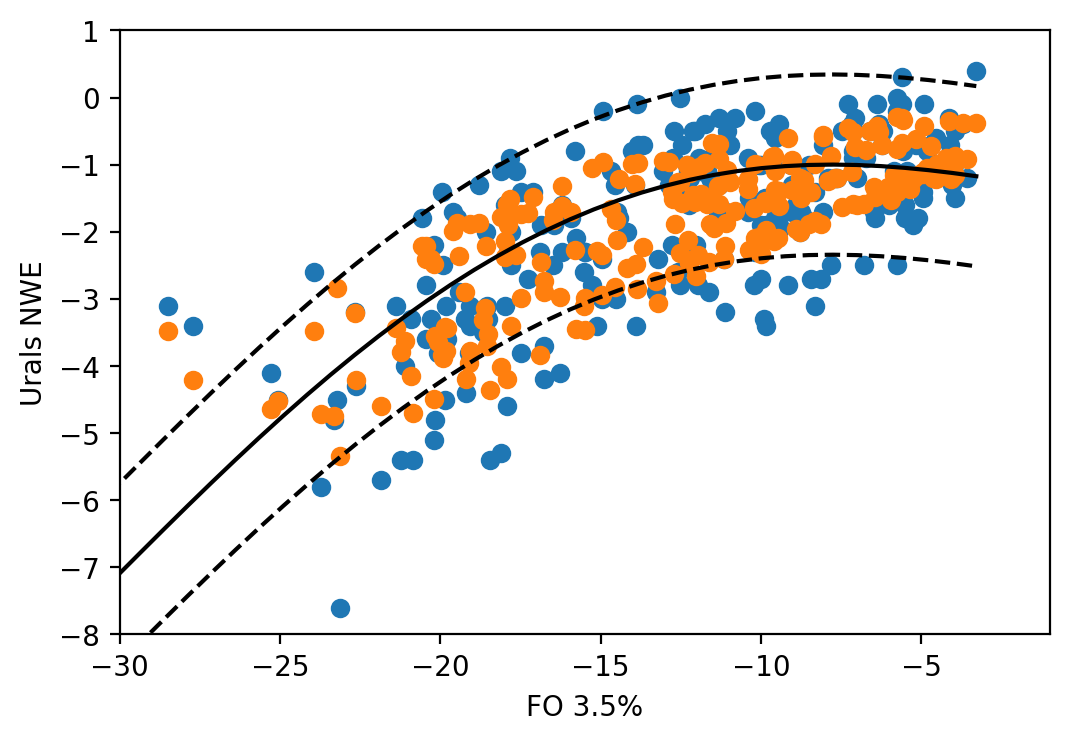

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"],combi["Urals NWE"])
#plt.scatter(combi["FO 3.5%"],pred_UralN)
plt.scatter(combi["FO 3.5%"],pred_UralN2)
plt.xlim([-30 ,-1])
plt.ylim([-8 ,1])

FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)

FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)
DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
Jet=Jet[::-1]

P_UralN =  0.283335353802878*Du + 0.0438064617068955*FO35 + 0.00320839301327694*Du*np.power(FO1,2) - 0.511831158401274 - 0.00194313007342261*Du*FO35*FO1
P_UralN2 = 0.243310947652501*(FO35) + 0.0327070285007665*(DB) + 0.000931100809264595*np.power(FO1,3) + 3.01672677408283e-5*np.power(FO1,4) - 0.771156577782479 - 0.00241982760220774*(DB)*(FO1) - 0.000191940652210639*np.power(DB,2)
#plt.plot(FO35,P_UralN,'k')
plt.plot(FO35,P_UralN2,'k')
plt.plot(FO35,P_UralN2+np.std(combi["Urals NWE"]),'--k')
plt.plot(FO35,P_UralN2-np.std(combi["Urals NWE"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Urals NWE')

In [16]:
FO1 = -1.28
FO35 = -7.42
Du = -0.51

P_UralN =  0.283335353802878*Du + 0.0438064617068955*FO35 + 0.00320839301327694*Du*np.power(FO1,2) - 0.511831158401274 - 0.00194313007342261*Du*FO35*FO1
print(P_UralN)

-0.9746449297589898


In [24]:

X = combi[['Dubai','FO 1%','FO 3.5%']]
Y = combi['Urals MED']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

New_Du = -0.51
New_Gasoil = 14.16
New_URM = -0.1
print ('Predicted Mars: \n', regr.predict([[New_Du, New_Gasoil, New_URM]]))

Intercept: 
 -0.40591260047150457
Coefficients: 
 [ 0.38378897  0.10541675 -0.03699875]
                            OLS Regression Results                            
Dep. Variable:              Urals MED   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     96.39
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           1.53e-40
Time:                        10:17:23   Log-Likelihood:                -315.71
No. Observations:                 236   AIC:                             639.4
Df Residuals:                     232   BIC:                             653.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [202]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m1,m2):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Dated Brent"]
    y=regr.predict([[db, m1,m2]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["Dated Brent"],combi["Dubai"])
    ax1.scatter(db,y, s=200)
    k1= combi["Dated Brent"]
    k2= combi["FO 3.5%"]
    k3= combi["FO 1%"]
    ax2.scatter(combi["Dubai"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-10 ,3])
    ax2.set_ylim([-10, 3])
    ax1.set_xlabel("Dated Brent")
    ax1.set_ylabel("Dubai diff")
    ax2.set_xlabel("Historic Dubai diff")
    ax2.set_ylabel("Predicted Dubai diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Dubai is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(0,150,0.1), m1=(-8, 8, 0.1),m2=(-8, 8, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=75.0, description='db', max=150.0), FloatSlider(value=0.0, description…

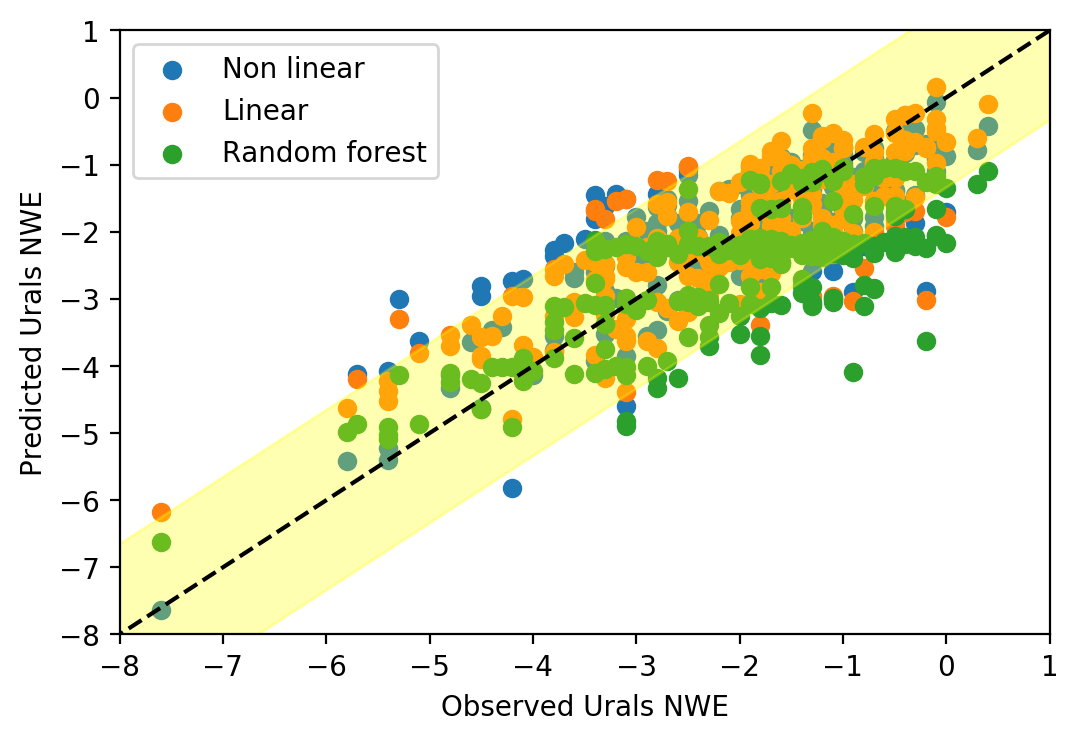

In [34]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dubai"]
k2= combi["FO 1%"]
k3= combi["FO 3.5%"]
linear_UralN=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Urals NWE"],pred_UralN)
plt_l =plt.scatter(combi["Urals NWE"],linear_UralN)



x_all=combi[["Dubai","FO 3.5%","FO 1%"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Urals NWE"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Urals NWE"]), pop_mean-np.std(combi["Urals NWE"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Urals NWE')
plt.ylabel('Predicted Urals NWE')
plt.xlim([-8, 1])
plt.ylim([-8, 1])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [3]:
pred_MayaU =  0.687587246470687*combi["FO 3.5%"] + 0.00911247235417213*np.power(combi["Jet"],2) + 0.0036123829112612*np.power(combi["FO 3.5%"],2) - 0.242991626831371*combi["Jet"]

Text(0, 0.5, 'Maya USGC')

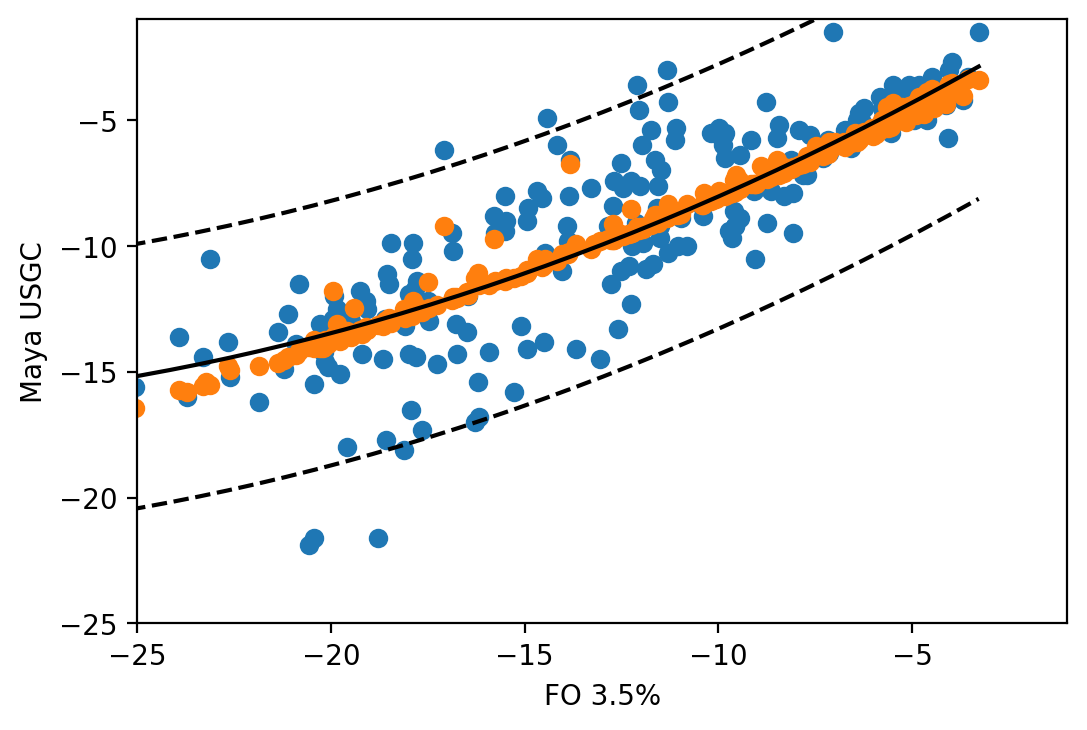

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"],combi["Maya USGC"])
plt.scatter(combi["FO 3.5%"],pred_MayaU)
plt.xlim([-25 ,-1])
plt.ylim([-25 ,-1])


FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
Jet=Jet[::-1]

P_MayaU =  0.687587246470687*FO35 + 0.00911247235417213*np.power(Jet,2) + 0.0036123829112612*np.power(FO35,2) - 0.242991626831371*Jet
plt.plot(FO35,P_MayaU,'k')
plt.plot(FO35,P_MayaU+np.std(combi["Maya USGC"]),'--k')
plt.plot(FO35,P_MayaU-np.std(combi["Maya USGC"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Maya USGC')

In [5]:
FO35 = -7.4
Jet = 15.53

P_MayaU =  0.687587246470687*FO35 + 0.00911247235417213*np.power(Jet,2) + 0.0036123829112612*np.power(FO35,2) - 0.242991626831371*Jet
print(P_MayaU)

-6.46623721674926


In [6]:

X = combi[['FO 3.5%','Jet']]
Y = combi['Maya USGC']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -0.2448577433473318
Coefficients: 
 [ 0.6099433  -0.04307775]
                            OLS Regression Results                            
Dep. Variable:              Maya USGC   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           4.53e-48
Time:                        08:35:58   Log-Likelihood:                -616.08
No. Observations:                 236   AIC:                             1238.
Df Residuals:                     233   BIC:                             1249.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m1,m2):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Dated Brent"]
    y=regr.predict([[db, m1,m2]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["Dated Brent"],combi["Azeri BTC"])
    ax1.scatter(db,y, s=200)
    k1= combi["Dated Brent"]
    k2= combi["Naphtha"]
    k3 = combi["Propane"]
    ax2.scatter(combi["Azeri BTC"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 +regr.coef_[2]*k3 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-1 , 4])
    ax2.set_ylim([-1, 4])
    ax1.set_xlabel("Dated Brent")
    ax1.set_ylabel("Azeri BTC diff")
    ax2.set_xlabel("Historic Azeri BTC diff")
    ax2.set_ylabel("Predicted Azeri BTC diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Maya USGC is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-10,10,0.1), m1=(-20, 20, 0.1), m2 =(-20,20,1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

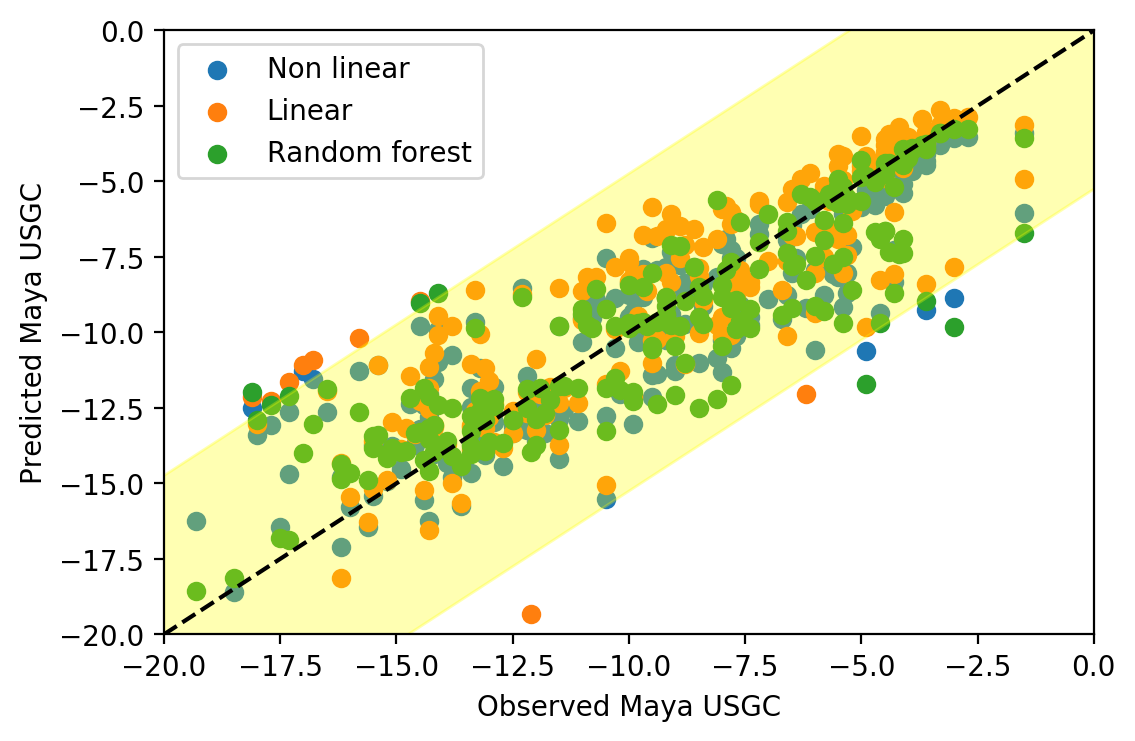

In [17]:
plt.rcParams['figure.dpi'] = 200

k1= combi["FO 3.5%"].iloc[26:]
k2= combi["Jet"].iloc[26:]
linear_MayaU=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 

plt_nl=plt.scatter(combi["Maya USGC"].iloc[26:],pred_MayaU.iloc[26:])
plt_l =plt.scatter(combi["Maya USGC"].iloc[26:],linear_MayaU)



x_all=combi[["FO 3.5%","Jet"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Maya USGC"].iloc[26:],y_all.iloc[26:])

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Maya USGC"]), pop_mean-np.std(combi["Maya USGC"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Maya USGC')
plt.ylabel('Predicted Maya USGC')
plt.xlim([-20, 0])
plt.ylim([-20, 0])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [82]:
Pred_UralM = 0.00724612659575245*(combi["FO 1%"])**2 + 0.00153428845373314*(combi["FO 1%"])**3 - 1.24167501962635 - 0.03181704251647*(combi["FO 3.5%"]) 
- 0.210034973409967*(combi["FO 1%"]) - 0.0295232993636577*(combi["FO 1%"])*(combi["FO 3.5%"]) - 0.00160888639770049*(combi["FO 3.5%"])*(combi["FO 1%"])**2

0      0.168420
1      0.091802
2      0.244034
3      0.133386
4     -0.020021
         ...   
231    0.234482
232   -0.081179
233   -0.019895
234   -0.036968
235   -0.042157
Length: 236, dtype: float64

Text(0, 0.5, 'Urals MED')

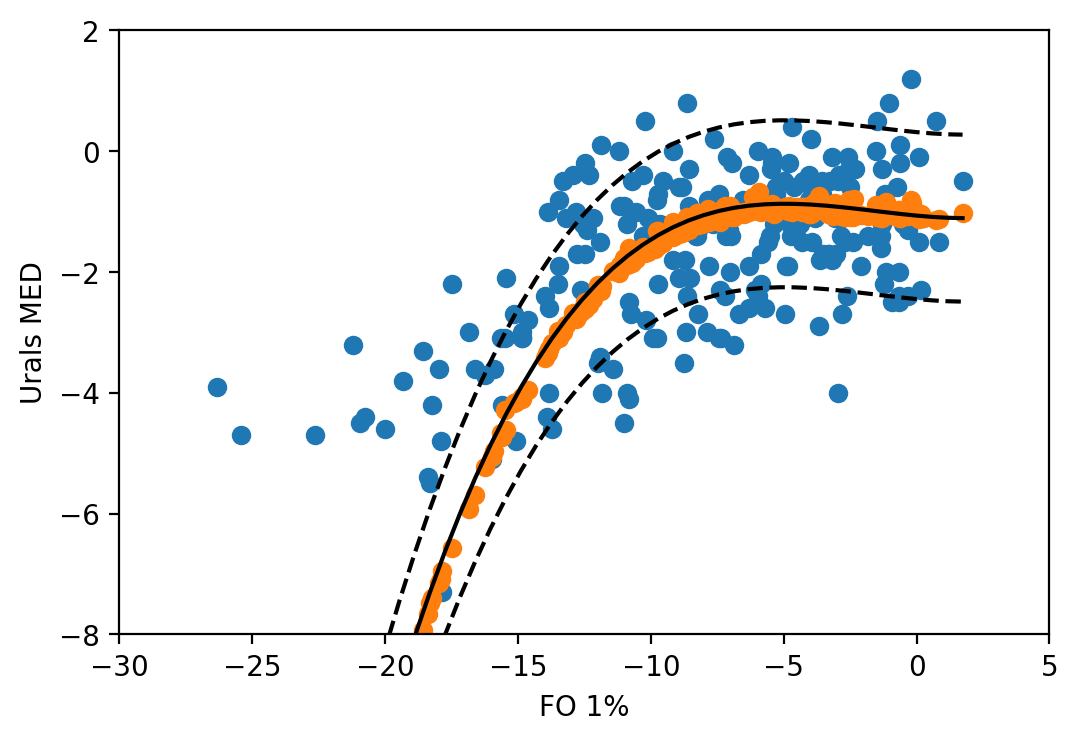

In [86]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 1%"],combi["Urals MED"])
plt.scatter(combi["FO 1%"],Pred_UralM)
plt.xlim([-30 ,5])
plt.ylim([-8 ,2])

FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)
FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)


P_UralM = 0.00724612659575245*(FO1)**2 + 0.00153428845373314*(FO1)**3 - 1.24167501962635 - 0.03181704251647*(FO35) 
- 0.210034973409967*(FO1) - 0.0295232993636577*(FO1)*(FO35) - 0.00160888639770049*(FO35)*(FO1)**2

plt.plot(FO1,P_UralM,'k')
plt.plot(FO1,P_UralM+np.std(combi["Urals MED"]),'--k')
plt.plot(FO1,P_UralM-np.std(combi["Urals MED"]),'--k')

plt.xlabel('FO 1%')
plt.ylabel('Urals MED')

In [ ]:
Pred_UralM = 0.291421970876107*combi["Dubai"] - 1.22717033972297 - 0.0966332745321596*combi["FO 3.5%"] - 0.0127575394587934*combi["Dubai"]*combi["FO 1%"] - 0.00680646224957921*np.power(combi["FO 1%"],2)

Text(0, 0.5, 'Urals MED')

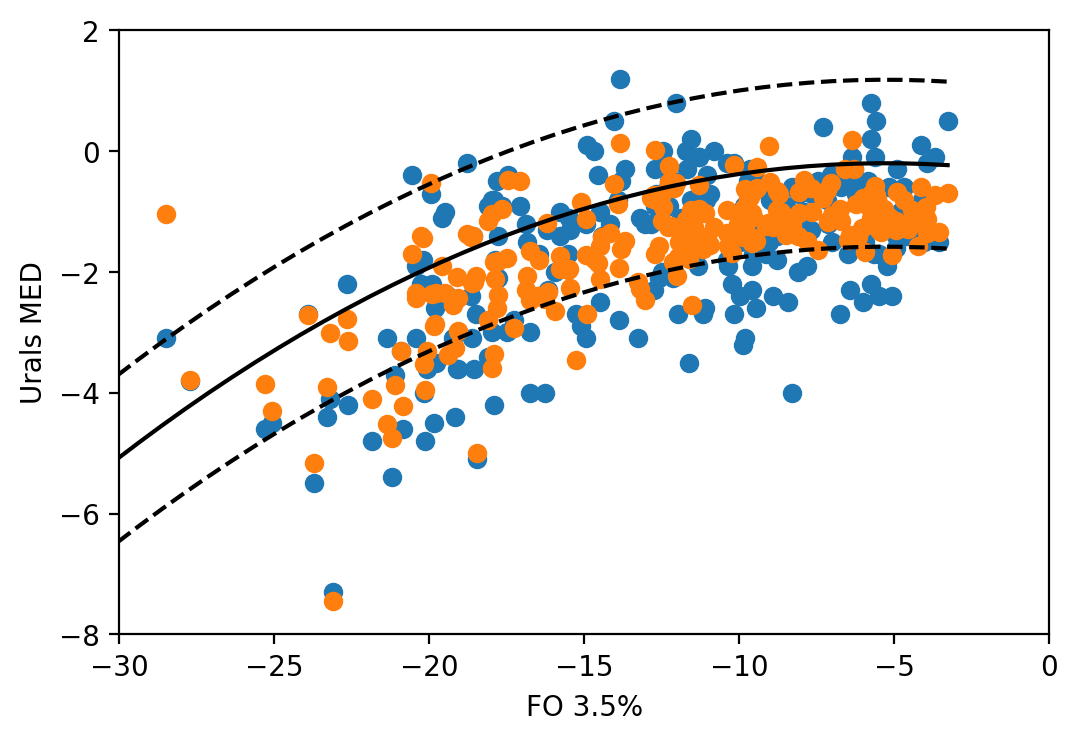

In [21]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"],combi["Urals MED"])
plt.scatter(combi["FO 3.5%"],Pred_UralM)
plt.xlim([-30 ,0])
plt.ylim([-8 ,2])

FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)
FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)

P_UralM =  0.291421970876107*Du - 1.22717033972297 - 0.0966332745321596*FO35 - 0.0127575394587934*Du*FO1 - 0.00680646224957921*np.power(FO1,2)
plt.plot(FO35,P_UralM,'k')
plt.plot(FO35,P_UralM+np.std(combi["Urals MED"]),'--k')
plt.plot(FO35,P_UralM-np.std(combi["Urals MED"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Urals MED')

In [23]:
FO1 = -1.28
FO35 = -7.4
Du = -0.51

P_UralM =  0.291421970876107*Du - 1.22717033972297 - 0.0966332745321596*FO35 - 0.0127575394587934*Du*FO1 - 0.00680646224957921*np.power(FO1,2)
print(P_UralM)

-0.6801891428402145


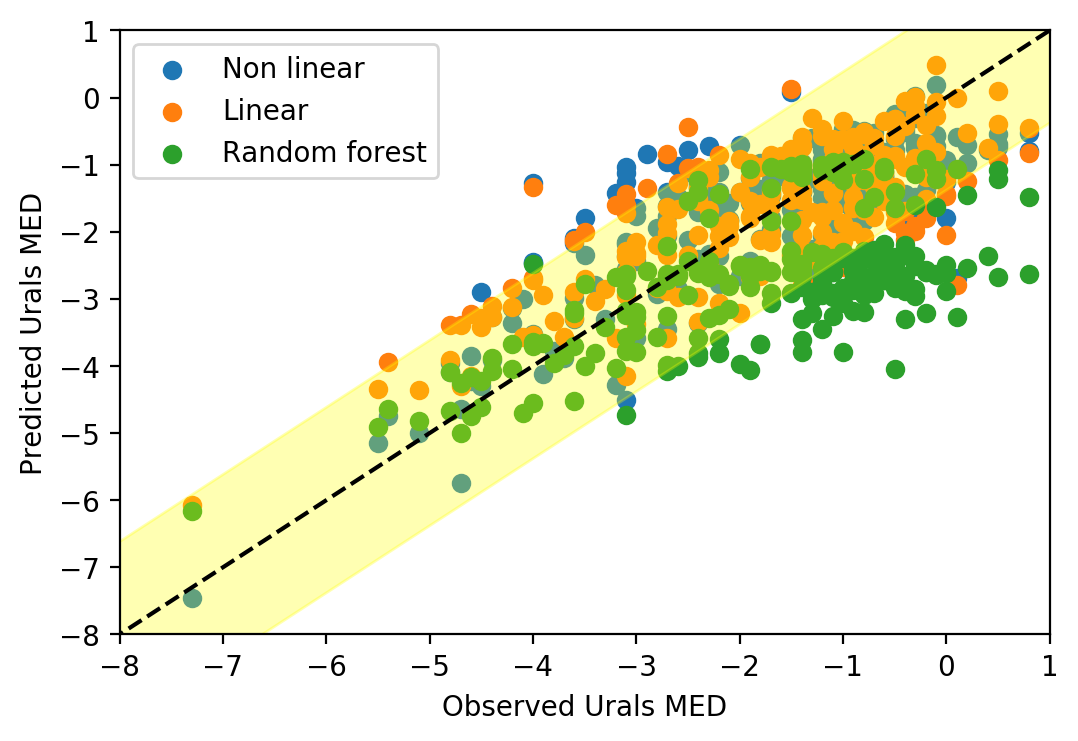

In [34]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dubai"]
k2= combi["FO 1%"]
k3= combi["FO 3.5%"]
linear_UralM=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Urals MED"],Pred_UralM)
plt_l =plt.scatter(combi["Urals MED"],linear_UralM)



x_all=combi[["Dubai","FO 3.5%","FO 1%"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Urals MED"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Urals MED"]), pop_mean-np.std(combi["Urals MED"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Urals MED')
plt.ylabel('Predicted Urals MED')
plt.xlim([-8, 1])
plt.ylim([-8, 1])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [2]:
Pred_WTI = -15.142388486653 - 2.06420352656404*combi["Butane"] - 0.00877784990583735*(combi["Dated Brent"])*(combi["VGO 0.5%"]) - 0.000867998048676867*np.power(combi["Butane"],3) - 0.0803378779475392*np.power(combi["Butane"],2)

Text(0, 0.5, 'WTI')

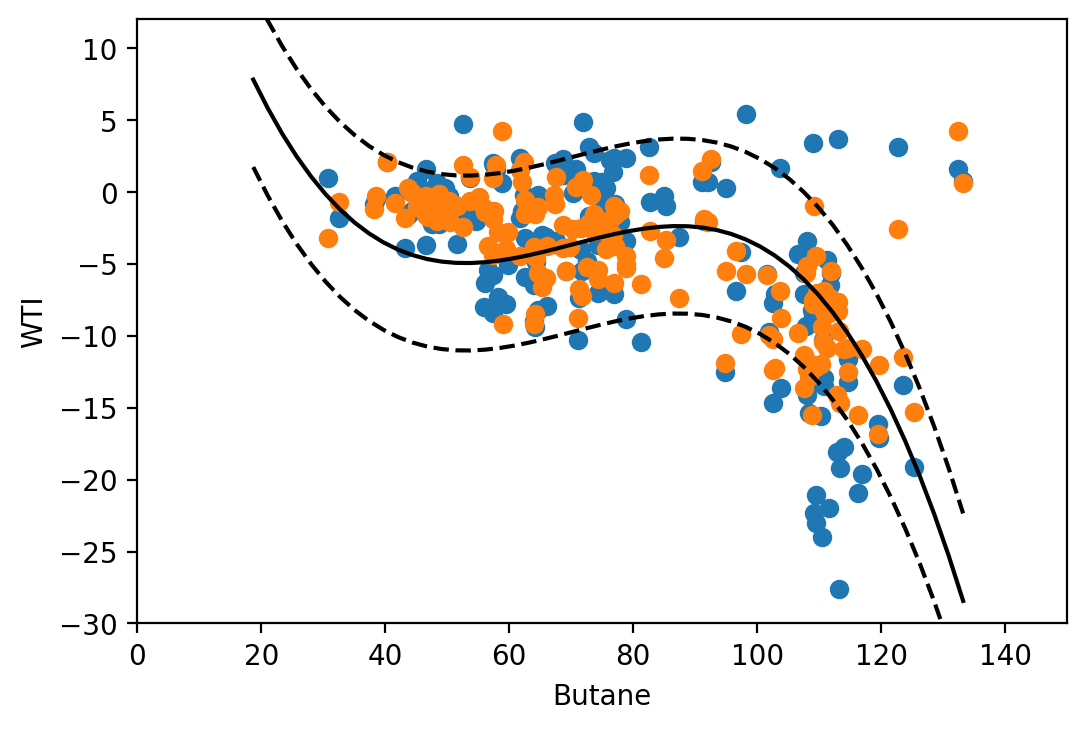

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dated Brent"].iloc[75:],combi["WTI"].iloc[75:])
plt.scatter(combi["Dated Brent"].iloc[75:],Pred_WTI.iloc[75:])
plt.xlim([0 ,150])
plt.ylim([-30 ,12])

DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
Bu = np.linspace(np.min(combi["Butane"]),np.max(combi["Butane"]),50)
VGO05 = np.linspace(np.min(combi["VGO 0.5%"]),np.max(combi["VGO 0.5%"]),50)

P_WTI = -15.142388486653 - 2.06420352656404*Bu - 0.00877784990583735*DB*VGO05 - 0.000867998048676867*np.power(Bu,3) - 0.0803378779475392*np.power(Bu,2)
plt.plot(DB,P_WTI,'k')
plt.plot(DB,P_WTI+np.std(combi["WTI"]),'--k')
plt.plot(DB,P_WTI-np.std(combi["WTI"]),'--k')

plt.xlabel('Butane')
plt.ylabel('WTI')

In [27]:
DB = 64.8875
Bu = -33.28
VGO05 = 6.03

P_WTI = -15.142388486653 - 2.06420352656404*Bu - 0.00877784990583735*DB*VGO05 - 0.000867998048676867*np.power(Bu,3) - 0.0803378779475392*np.power(Bu,2)
print(P_WTI)

-6.865098399980624


In [5]:

X = combi[['Butane','VGO 0.5%','Dated Brent']]
Y = combi['WTI']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 4.425657539939699
Coefficients: 
 [-0.05832338 -0.60368246 -0.11994083]
                            OLS Regression Results                            
Dep. Variable:                    WTI   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     62.47
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.21e-29
Time:                        06:47:35   Log-Likelihood:                -691.04
No. Observations:                 236   AIC:                             1390.
Df Residuals:                     232   BIC:                             1404.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


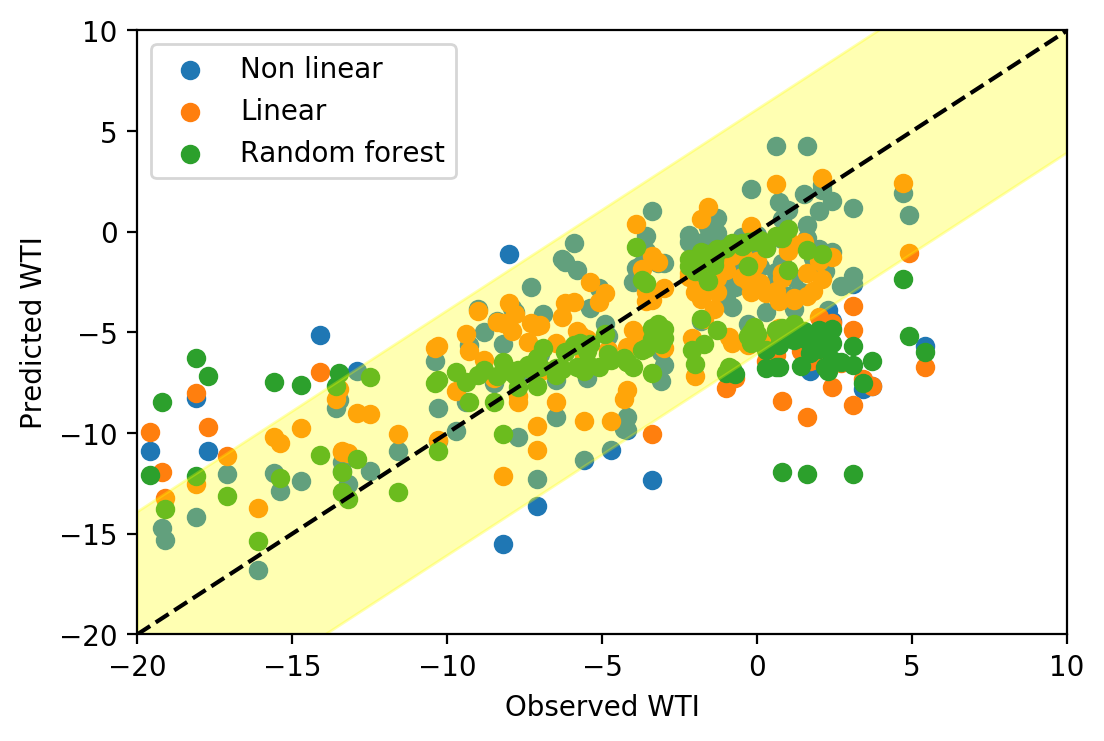

In [30]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Butane"]
k2= combi["VGO 0.5%"]
k3= combi["Dated Brent"]
linear_WTI=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["WTI"].iloc[75:],Pred_WTI.iloc[75:])
plt_l =plt.scatter(combi["WTI"].iloc[75:],linear_WTI.iloc[75:])



x_all=combi[["Dated Brent","Butane","VGO 0.5%"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["WTI"].iloc[75:],y_all.iloc[75:])

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["WTI"]), pop_mean-np.std(combi["WTI"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed WTI')
plt.ylabel('Predicted WTI')
plt.xlim([-20, 10])
plt.ylim([-20, 10])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

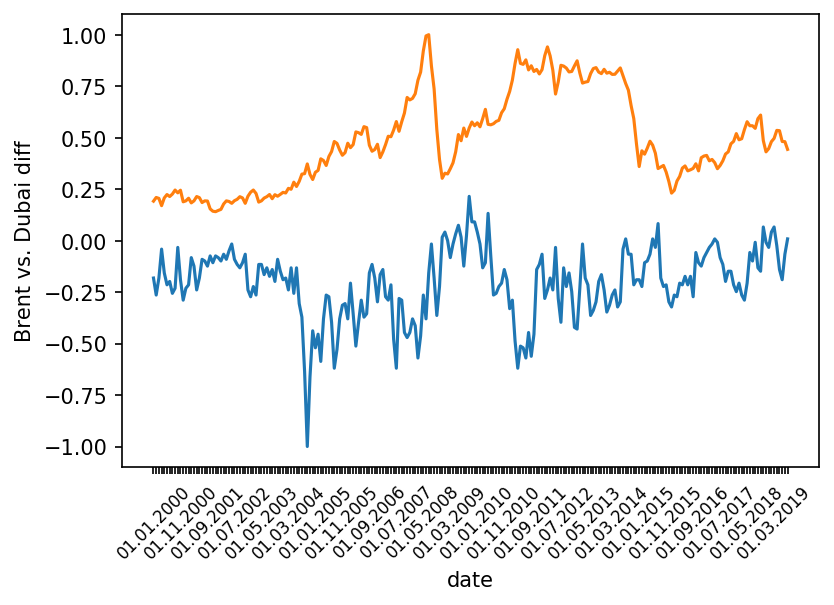

In [2]:
import matplotlib.dates as dates
plt.rcParams['figure.dpi'] = 150

years1=dates.YearLocator(1) 
fig, ax = plt.subplots()
ax.plot(combi["Date"],combi["Dubai"]/np.max(np.absolute(combi["Dubai"])))
ax.plot(combi["Date"],combi["Dated Brent"]/np.max(combi["Dated Brent"]))


every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.setp(plt.gca().get_xticklabels(), rotation=45, fontsize=8)
ax.set_xlabel('date')
ax.set_ylabel('Brent vs. Dubai diff')
plt.show()

In [122]:
print(np.max(np.absolute(combi["Dubai"])))

12.1


In [4]:
Pred_Dubai = 0.231614617140716*(combi["FO 3.5%"]) + 0.0567664299088329*(combi["Dated Brent"]) + 0.000111685887466789*(combi["Dated Brent"])*np.power(combi["FO 3.5%"],2) - 1.13165773385408 - 3.92742103073686e-6*np.power(combi["Dated Brent"],3) - 0.0101251631604449*np.power(combi["FO 3.5%"],2)

Text(0, 0.5, 'Dubai')

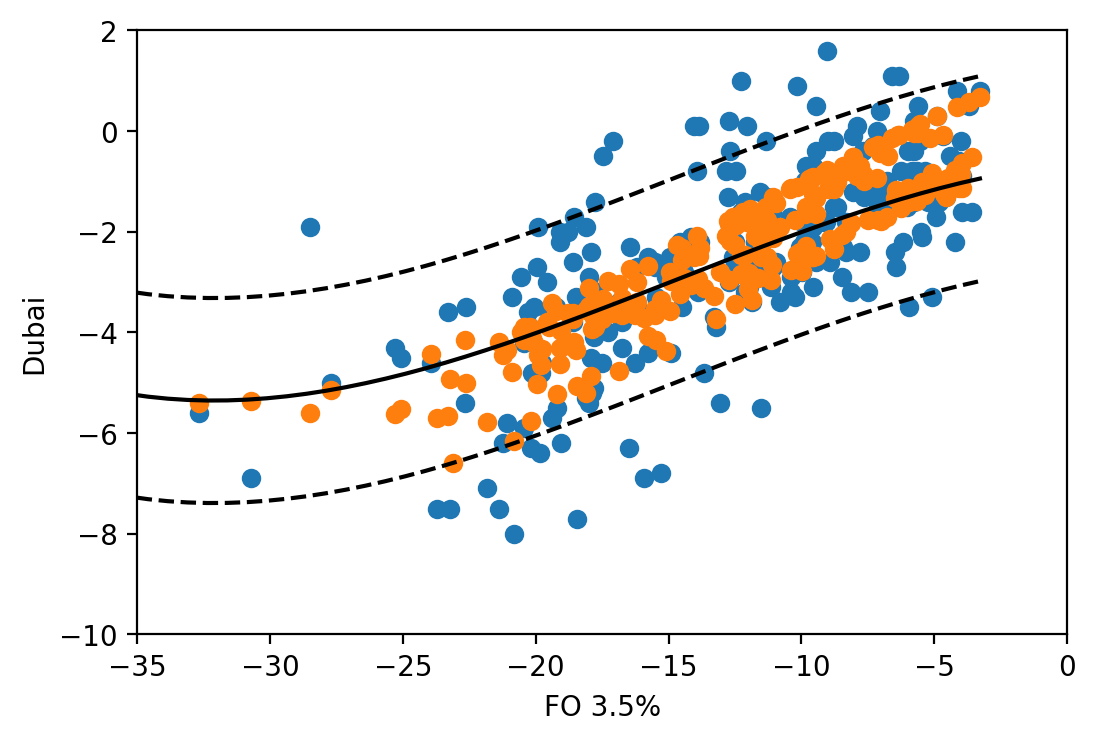

In [5]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"],combi["Dubai"])
plt.scatter(combi["FO 3.5%"],Pred_Dubai)
plt.xlim([-35 ,0])
plt.ylim([-10 ,2])

DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)
FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
VGO2 = np.linspace(np.min(combi["VGO 2%"]),np.max(combi["VGO 2%"]),50)
DB=DB[::-1]

P_Dubai = 0.231614617140716*(FO35) + 0.0567664299088329*(DB) + 0.000111685887466789*(DB)*np.power(FO35,2) - 1.13165773385408 - 3.92742103073686e-6*np.power(DB,3) - 0.0101251631604449*np.power(FO35,2)

plt.plot(FO35,P_Dubai,'k')
plt.plot(FO35,P_Dubai+np.std(combi["Dubai"]),'--k')
plt.plot(FO35,P_Dubai-np.std(combi["Dubai"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Dubai')

In [5]:
DB = 112
FO1 = -10.86
FO35 = -16.83




P_Dubai = 0.231614617140716*(FO35) + 0.0567664299088329*(DB) + 0.000111685887466789*(DB)*np.power(FO35,2) - 1.13165773385408 - 3.92742103073686e-6*np.power(DB,3) - 0.0101251631604449*np.power(FO35,2)
print(P_Dubai)

-3.5144673576355845


In [8]:

X = combi[['Dated Brent','FO 3.5%','FO 1%']]
Y = combi['Dubai']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -0.06257811235699728
Coefficients: 
 [ 0.01204645  0.28296009 -0.05445669]
                            OLS Regression Results                            
Dep. Variable:                  Dubai   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     63.18
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           6.76e-30
Time:                        10:56:50   Log-Likelihood:                -432.24
No. Observations:                 236   AIC:                             872.5
Df Residuals:                     232   BIC:                             886.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


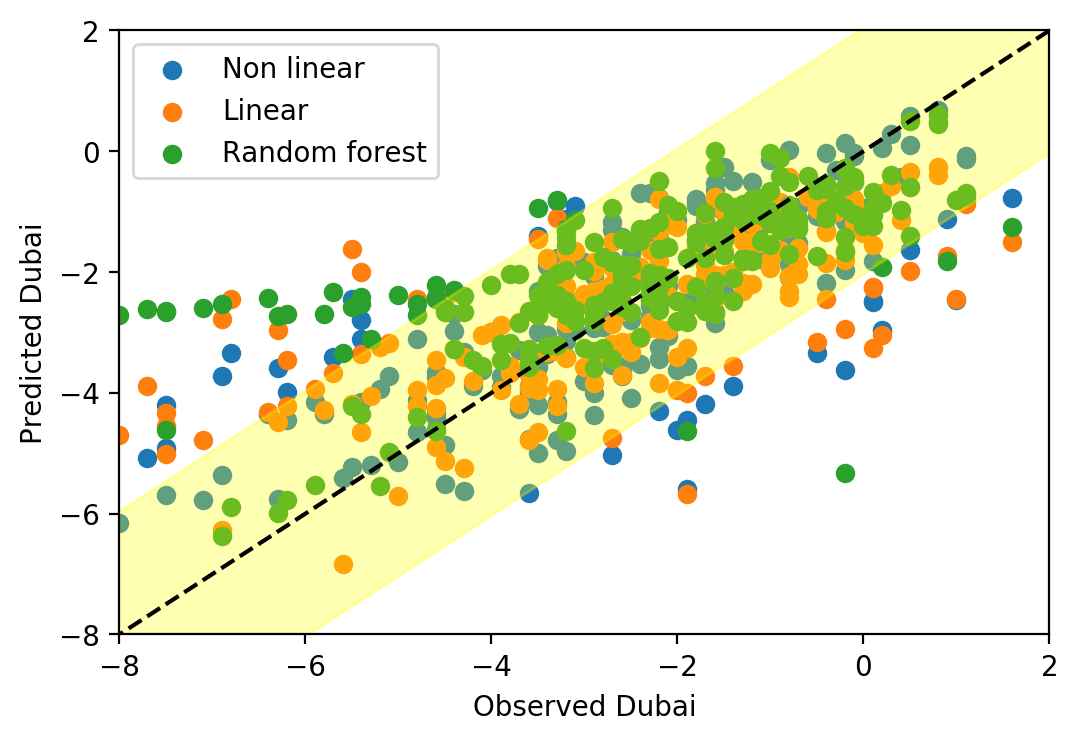

In [211]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dated Brent"]
k2= combi["FO 3.5%"]
k3= combi["FO 1%"]
linear_Dubai=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Dubai"],Pred_Dubai)
plt_l =plt.scatter(combi["Dubai"],linear_Dubai)



x_all=combi[["Dated Brent","FO 3.5%","FO 1%"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Dubai"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Dubai"]), pop_mean-np.std(combi["Dubai"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Dubai')
plt.ylabel('Predicted Dubai')
plt.xlim([-8, 2])
plt.ylim([-8, 2])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [9]:

k1= 112
k2= -16.83
k3= -10.86
linear_Dubai=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 
print(linear_Dubai)

-2.884194030047542


In [16]:

X = combi[['Dated Brent','ULSD','Jet']]
Y = combi['Tapis']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -1.0645973481552322
Coefficients: 
 [ 0.03637429 -0.04613534  0.18462491]
                            OLS Regression Results                            
Dep. Variable:                  Tapis   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     156.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.28e-55
Time:                        11:02:35   Log-Likelihood:                -384.56
No. Observations:                 236   AIC:                             777.1
Df Residuals:                     232   BIC:                             791.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
Pred_Tapis= 0.569028548370371 + 0.158148187922098*combi["Jet"] + 1.72847337855664e-6*np.power(combi["Dated Brent"],3) + 0.000198531291135097*combi["Jet"]*np.power(combi["ULSD"],2) - 0.000213781975514373*np.power(combi["ULSD"],3)


Text(0, 0.5, 'Tapis')

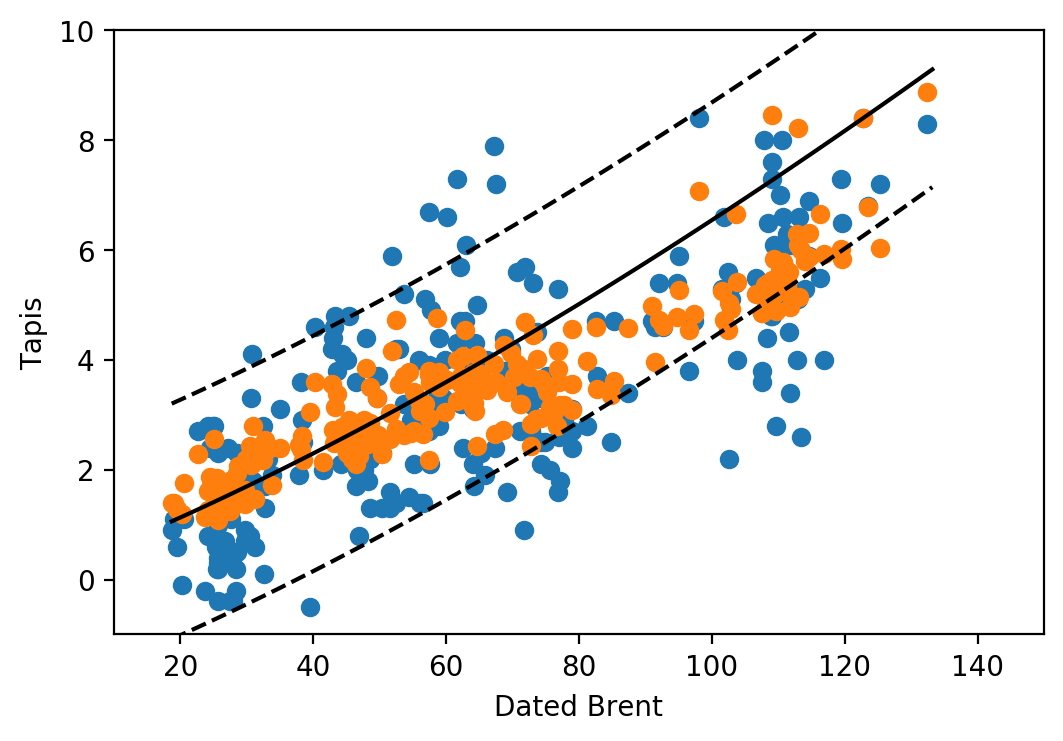

In [29]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dated Brent"],combi["Tapis"])
plt.scatter(combi["Dated Brent"],Pred_Tapis)
plt.xlim([10,150])
plt.ylim([-1,10])

DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
UL = np.linspace(np.min(combi["ULSD"]),np.max(combi["ULSD"]),50)

P_Tapis = 0.569028548370371 + 0.158148187922098*Jet + 1.72847337855664e-6*np.power(DB,3) + 0.000198531291135097*Jet*np.power(UL,2) - 0.000213781975514373*np.power(UL,3)
plt.plot(DB,P_Tapis,'k')
plt.plot(DB,P_Tapis+np.std(combi["Tapis"]),'--k')
plt.plot(DB,P_Tapis-np.std(combi["Tapis"]),'--k')

plt.xlabel('Dated Brent')
plt.ylabel('Tapis')

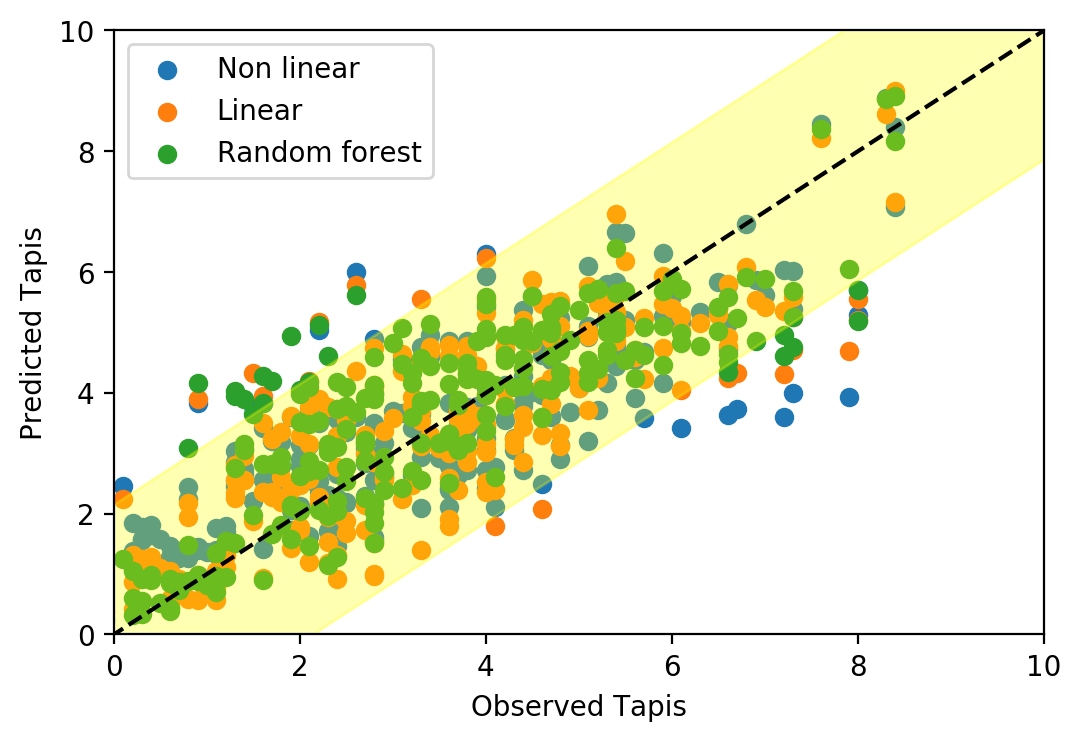

In [39]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dated Brent"]
k2= combi["ULSD"]
k3= combi["Jet"]
linear_Tapis=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Tapis"],Pred_Tapis)
plt_l =plt.scatter(combi["Tapis"],linear_Tapis)



x_all=combi[["Dated Brent","Jet"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Tapis"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Tapis"]), pop_mean-np.std(combi["Tapis"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Tapis')
plt.ylabel('Predicted Tapis')
plt.xlim([0,10])
plt.ylim([0,10])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [15]:

X = combi[['Dated Brent','Naphtha','Propane']]
Y = combi['Azeri BTC']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -0.14242921745099235
Coefficients: 
 [ 0.00204873 -0.04288511 -0.0296611 ]
                            OLS Regression Results                            
Dep. Variable:              Azeri BTC   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     72.10
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           5.56e-33
Time:                        07:40:00   Log-Likelihood:                -240.36
No. Observations:                 236   AIC:                             488.7
Df Residuals:                     232   BIC:                             502.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
Pred_BTC = 2 - 0.0186675105114445*combi["Dated Brent"]*np.exp(-7.82878945629328e-9*combi["Propane"]*combi["Naphtha"]*np.power(combi["Dated Brent"],3))


Text(0, 0.5, 'Azeri BTC')

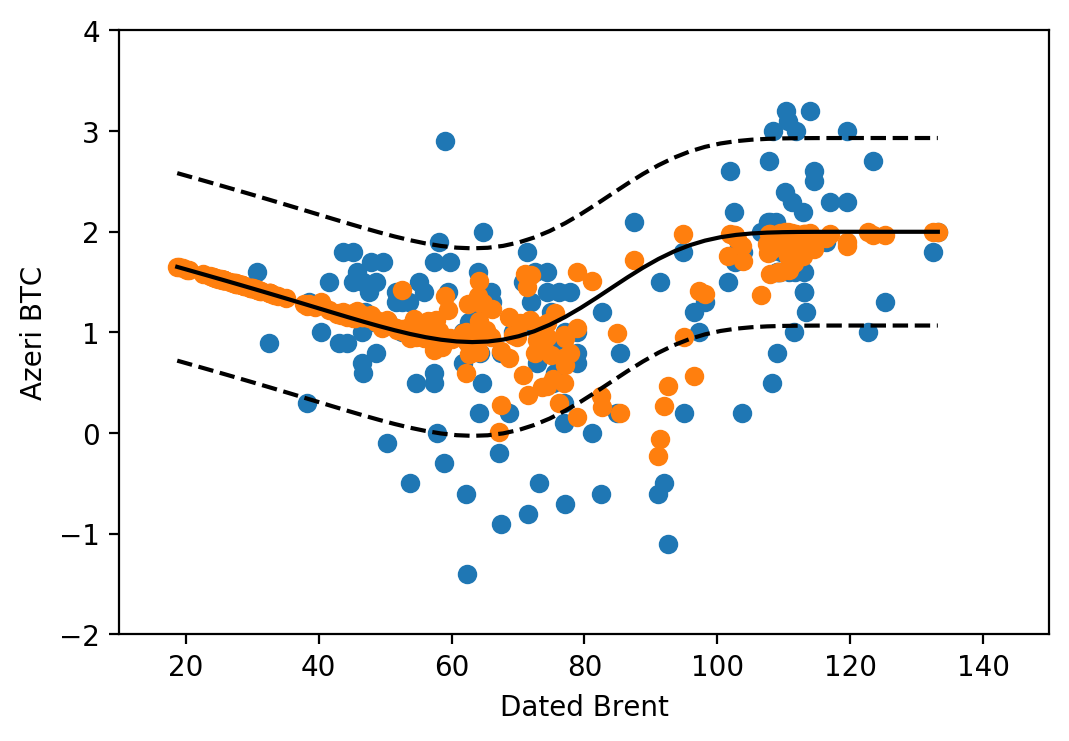

In [13]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dated Brent"].iloc[79:],combi["Azeri BTC"].iloc[79:])
plt.scatter(combi["Dated Brent"],Pred_BTC)
plt.xlim([10,150])
plt.ylim([-2,4])

DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
Po = np.linspace(np.min(combi["Propane"]),np.max(combi["Propane"]),50)
Na = np.linspace(np.min(combi["Naphtha"]),np.max(combi["Naphtha"]),50)
Na=Na[::-1]
Po=Po[::-1]

P_BTC = 2 - 0.0186675105114445*DB*np.exp(-7.82878945629328e-9*Po*Na*np.power(DB,3))

plt.plot(DB,P_BTC,'k')
plt.plot(DB,P_BTC+np.std(combi["Azeri BTC"]),'--k')
plt.plot(DB,P_BTC-np.std(combi["Azeri BTC"]),'--k')

plt.xlabel('Dated Brent')
plt.ylabel('Azeri BTC')

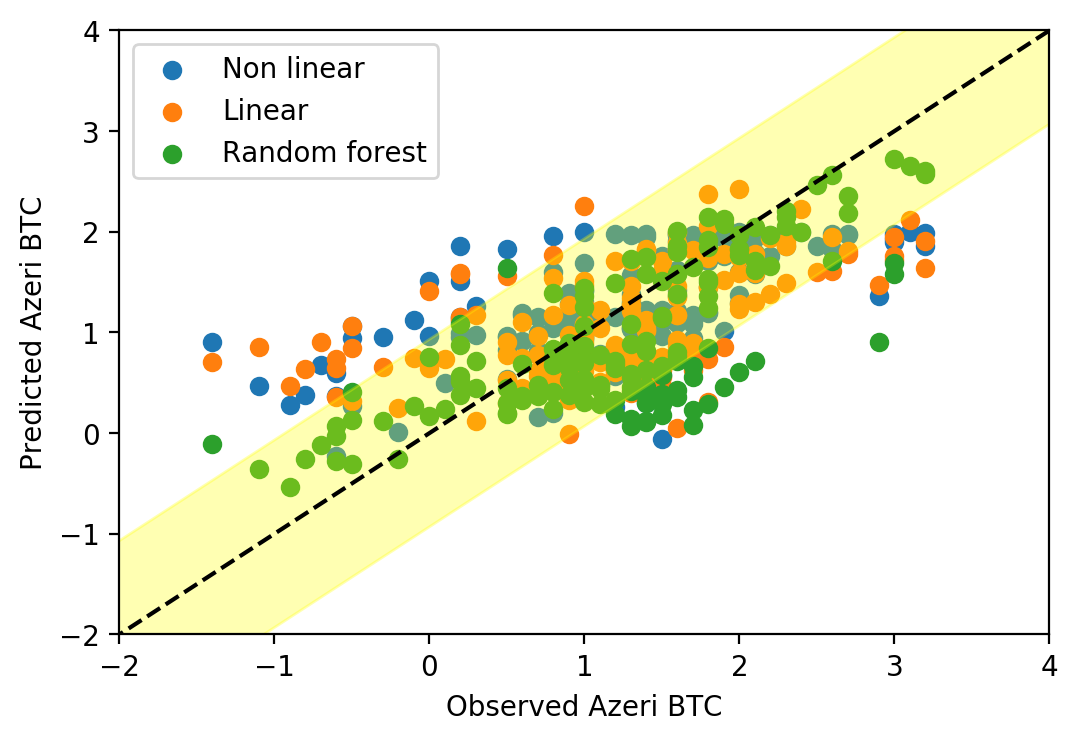

In [21]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dated Brent"]
k2= combi["Naphtha"]
k3= combi["Propane"]
linear_BTC=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Azeri BTC"].iloc[79:],Pred_BTC.iloc[79:])
plt_l =plt.scatter(combi["Azeri BTC"].iloc[79:],linear_BTC.iloc[79:])



x_all=combi[["Dated Brent","Naphtha","Propane"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Azeri BTC"].iloc[79:],y_all.iloc[79:])

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Azeri BTC"]), pop_mean-np.std(combi["Azeri BTC"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Azeri BTC')
plt.ylabel('Predicted Azeri BTC')
plt.xlim([-2,4])
plt.ylim([-2,4])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [107]:

X = combi[['Dubai','ESPO','FO 1%']]
Y = combi['Dalia']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -0.7837657309539118
Coefficients: 
 [0.0177944 0.1931921 0.0209338]
                            OLS Regression Results                            
Dep. Variable:                  Dalia   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     3.831
Date:                Tue, 24 Sep 2019   Prob (F-statistic):             0.0105
Time:                        08:35:08   Log-Likelihood:                -389.62
No. Observations:                 236   AIC:                             787.2
Df Residuals:                     232   BIC:                             801.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 120

def f(db, m1,m2,m3):
#def f(db):  
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    x = combi["Dated Brent"]
    y=regr.predict([[db, m1,m2,m3]])
    #y=regr.predict([[db]])
    
    ax1.scatter(combi["Dated Brent"],combi["Arab light"])
    ax1.scatter(db,y, s=200)
    k1= combi["Dated Brent"]
    k2= combi["Jet"]
    k3= combi["VGO 2%"]
    k4= combi["ULSD"]
    
    ax2.scatter(combi["Arab Heavy"], regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2  + regr.coef_[2]*k3 ++ regr.coef_[3]*k4 )
    #ax2.scatter(brdiff["Bonny light"], regr.intercept_+ regr.coef_[0]*k1 )
    ax2.set_xlim([-10 , -1])
    ax2.set_ylim([-10, -1])
    ax1.set_xlabel("Dated Brent")
    ax1.set_ylabel("Arab light diff")
    ax2.set_xlabel("Historic Arab light diff")
    ax2.set_ylabel("Predicted Arab light diff")
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
    
    
    print("predicted Maya USGC is", y )

#interactive_plot = interactive(f, db=(10,150,1))
interactive_plot = interactive(f, db=(-10,10,0.1), m1=(-20, 20, 0.1),m2=(-20, 20, 0.1),m3=(-20, 20, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='db', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [114]:
Pred_Dalia = 0.234503803376072*combi["ESPO"] + 0.234503803376072*(combi["FO 1%"]) + 0.0171353259496831*combi["Dubai"]*np.power(combi["ESPO"],2) + 0.00773746902124079*(combi["FO 1%"])*np.power(combi["Dubai"],2) + 0.000170110060451618*(combi["Dubai"])*np.power(combi["FO 1%"],3) - 0.558182180358936 - 0.210432224741585*(combi["Dubai"])


Text(0, 0.5, 'Dalia')

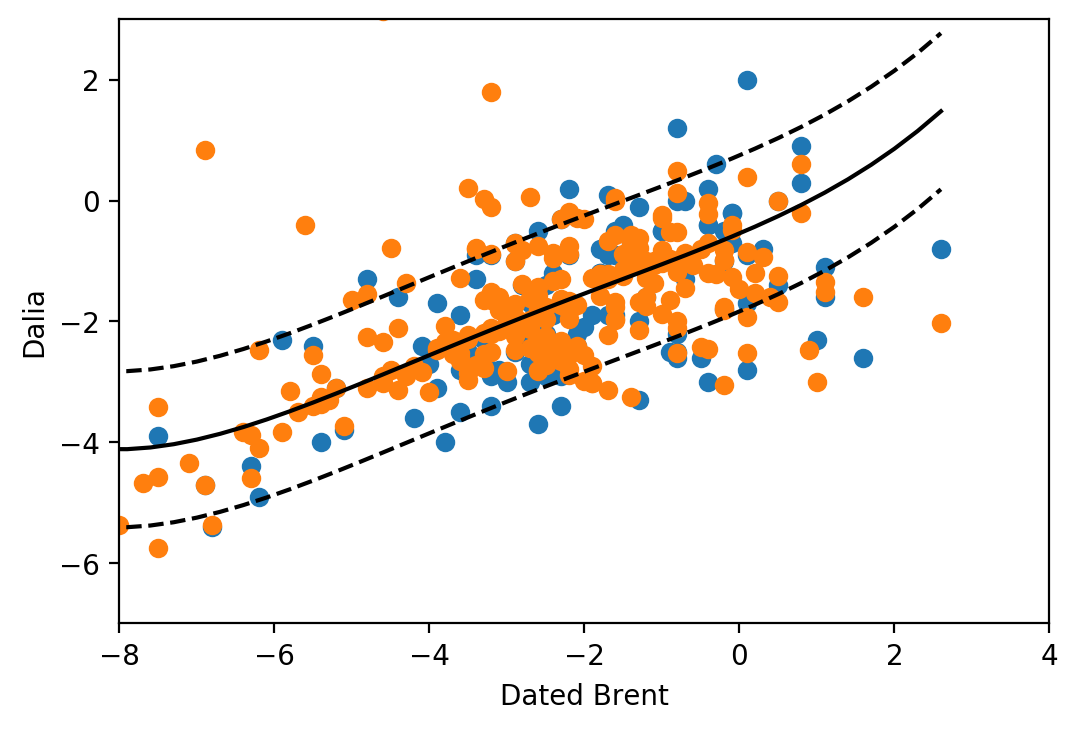

In [116]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dubai"].iloc[116:],combi["Dalia"].iloc[116:])
plt.scatter(combi["Dubai"],Pred_Dalia)
plt.xlim([-8,4])
plt.ylim([-7,3])

Du = np.linspace(np.min(combi["Dubai"]),np.max(combi["Dubai"]),50)
FO1 = np.linspace(np.min(combi["FO 1%"]),np.max(combi["FO 1%"]),50)
ESPO = np.linspace(np.min(combi["ESPO"]),np.max(combi["ESPO"]),50)


P_Dalia = 0.234503803376072*ESPO + 0.234503803376072*(FO1) + 0.0171353259496831*Du*np.power(ESPO,2) + 0.00773746902124079*(FO1)*np.power(Du,2) + 0.000170110060451618*Du*np.power(FO1,3) - 0.558182180358936 - 0.210432224741585*Du


plt.plot(Du,P_Dalia,'k')
plt.plot(Du,P_Dalia+np.std(combi["Dalia"]),'--k')
plt.plot(Du,P_Dalia-np.std(combi["Dalia"]),'--k')

plt.xlabel('Dated Brent')
plt.ylabel('Dalia')

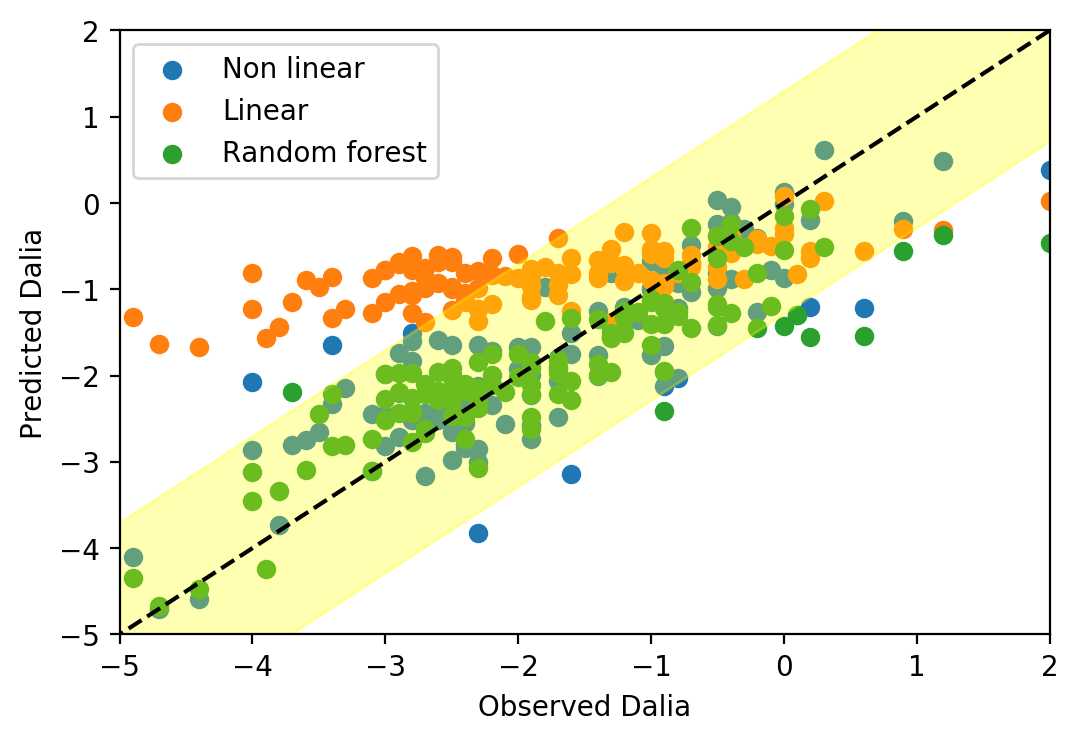

In [117]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dubai"]
k2= combi["ESPO"]
k3= combi["FO 1%"]

linear_Dalia=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 

plt_nl=plt.scatter(combi["Dalia"].iloc[116:],Pred_Dalia.iloc[116:])
plt_l =plt.scatter(combi["Dalia"].iloc[116:],linear_Dalia.iloc[116:])



x_all=combi[["Dubai","ESPO","FO 1%"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Dalia"].iloc[116:],y_all.iloc[116:])

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Dalia"]), pop_mean-np.std(combi["Dalia"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Dalia')
plt.ylabel('Predicted Dalia')
plt.xlim([-5,2])
plt.ylim([-5,2])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [19]:

X = combi[['Dated Brent','Jet','VGO 2%']]
Y = combi['Arab light']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -1.6137823342060336
Coefficients: 
 [ 0.00974402 -0.12694593  0.16609236]
                            OLS Regression Results                            
Dep. Variable:             Arab light   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     28.78
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           7.36e-16
Time:                        14:20:23   Log-Likelihood:                -442.41
No. Observations:                 236   AIC:                             892.8
Df Residuals:                     232   BIC:                             906.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'Arab light')

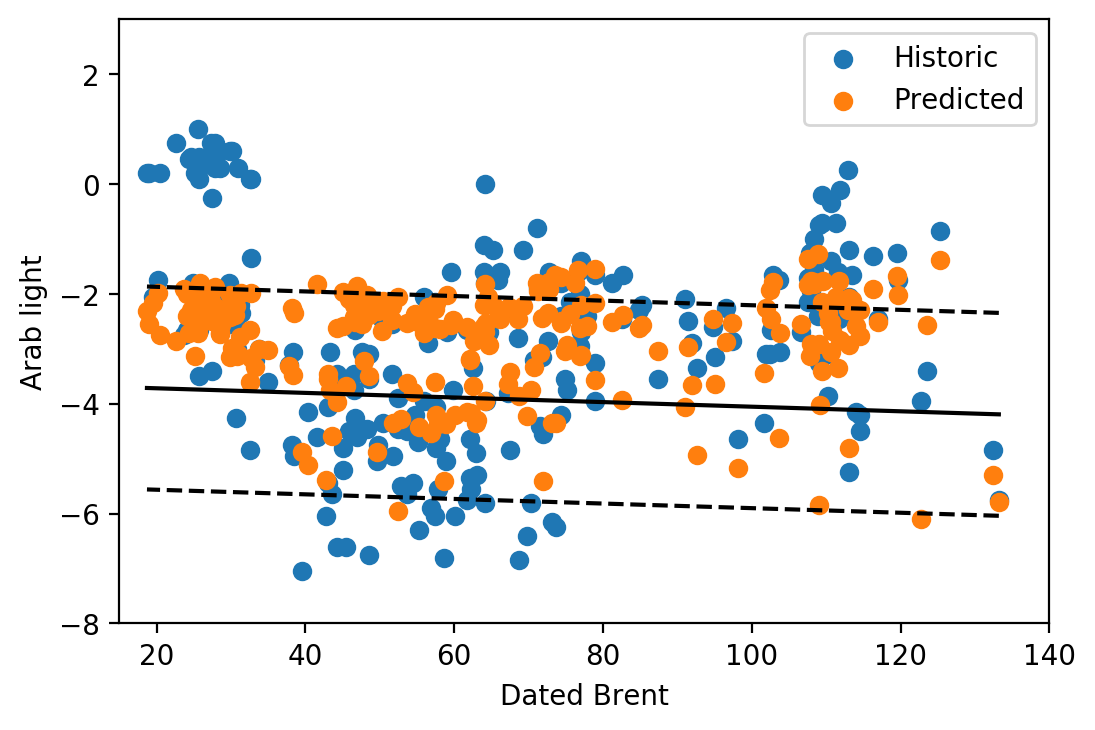

In [24]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dated Brent"],combi["Arab light"])


DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
VGO2 = np.linspace(np.min(combi["VGO 2%"]),np.max(combi["VGO 2%"]),50)


Jet=Jet[::-1]
DB=DB[::-1]
VGO2=VGO2[::-1]

plt.scatter(combi["Dated Brent"],regr.intercept_+ regr.coef_[0]*combi["Dated Brent"] + regr.coef_[1]*combi["Jet"] 
            + regr.coef_[2]*combi["VGO 2%"] )
plt.xlim([15,140])
plt.ylim([-8,3])
plt.legend(['Historic','Predicted'])

P_ArabLinear = regr.intercept_+ regr.coef_[0]*DB + regr.coef_[1]*Jet + regr.coef_[2]*VGO2


plt.plot(DB,P_ArabLinear,'k')
plt.plot(DB,P_ArabLinear+np.std(combi["Arab light"]),'--k')
plt.plot(DB,P_ArabLinear-np.std(combi["Arab light"]),'--k')

plt.xlabel('Dated Brent')
plt.ylabel('Arab light')


In [10]:
Pred_ArabL = 7.89067436674442 + 0.0158412920210973*combi["Jet"]*(combi["VGO 2%"]) + 0.00760596666502651*np.power(combi["Dated Brent"],2) - 0.534520760449475*(combi["Dated Brent"]) - 3.23806029482173e-5*np.power(combi["Dated Brent"],3) - 1.39671145737361e-9*(combi["VGO 2%"])*np.power(combi["Dated Brent"],4)


Text(0, 0.5, 'Arab light')

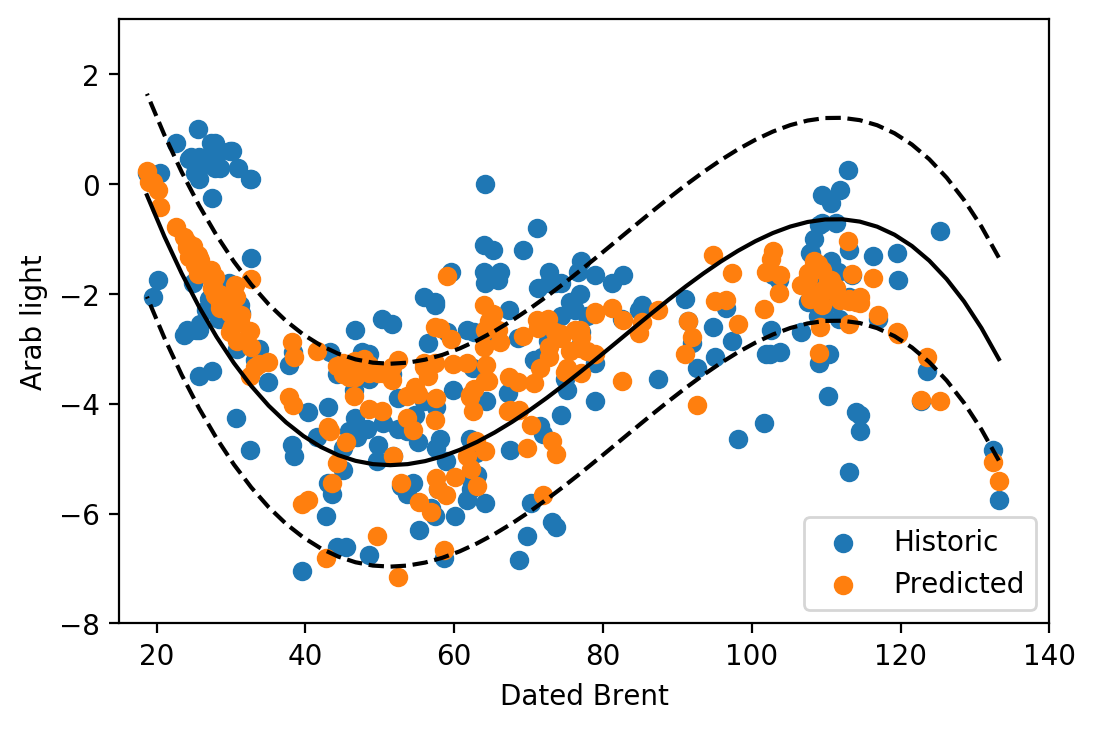

In [18]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["Dated Brent"],combi["Arab light"])
plt.scatter(combi["Dated Brent"],Pred_ArabL)
plt.xlim([15,140])
plt.ylim([-8,3])
plt.legend(['Historic','Predicted'])

DB = np.linspace(np.min(combi["Dated Brent"]),np.max(combi["Dated Brent"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
VGO2 = np.linspace(np.min(combi["VGO 2%"]),np.max(combi["VGO 2%"]),50)

Jet=Jet[::-1]
DB=DB[::-1]
VGO2=VGO2[::-1]

P_ArabL = 7.89067436674442 + 0.0158412920210973*Jet*(VGO2) + 0.00760596666502651*np.power(DB,2) - 0.534520760449475*(DB) - 3.23806029482173e-5*np.power(DB,3) - 1.39671145737361e-9*(VGO2)*np.power(DB,4)

plt.plot(DB,P_ArabL,'k')
plt.plot(DB,P_ArabL+np.std(combi["Arab light"]),'--k')
plt.plot(DB,P_ArabL-np.std(combi["Arab light"]),'--k')

plt.xlabel('Dated Brent')
plt.ylabel('Arab light')


Text(0, 0.5, 'Arab light')

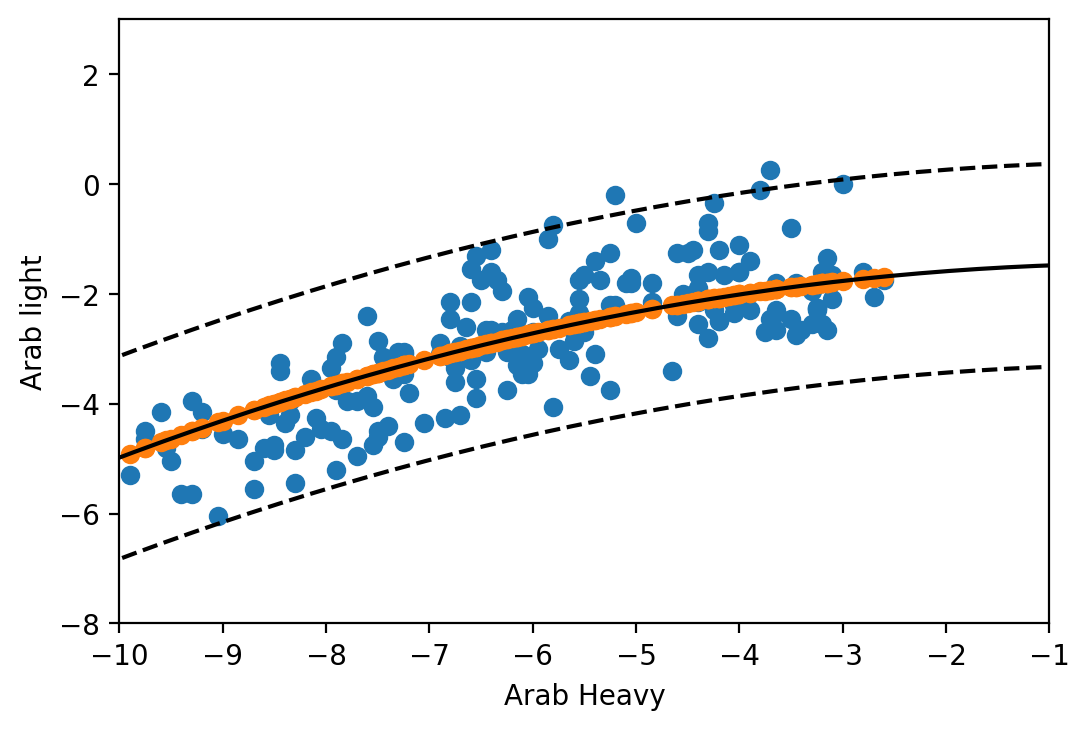

In [19]:
plt.rcParams['figure.dpi'] = 200

plt.scatter(combi["Arab Heavy"],combi["Arab light"])
Pred_ArabL= -1.44362367573373 - 0.0353491468524713*np.power(combi["Arab Heavy"],2)

plt.scatter(combi["Arab Heavy"],Pred_ArabL)
plt.xlim([-10,-1])
plt.ylim([-8,3])




AH= np.linspace(np.min(combi["Arab Heavy"]),np.max(combi["Arab Heavy"]),50)


P_ArabL = -1.44362367573373 - 0.0353491468524713*np.power(AH,2)

plt.plot(AH,P_ArabL,'k')
plt.plot(AH,P_ArabL+np.std(combi["Arab light"]),'--k')
plt.plot(AH,P_ArabL-np.std(combi["Arab light"]),'--k')

plt.xlabel('Arab Heavy')
plt.ylabel('Arab light')

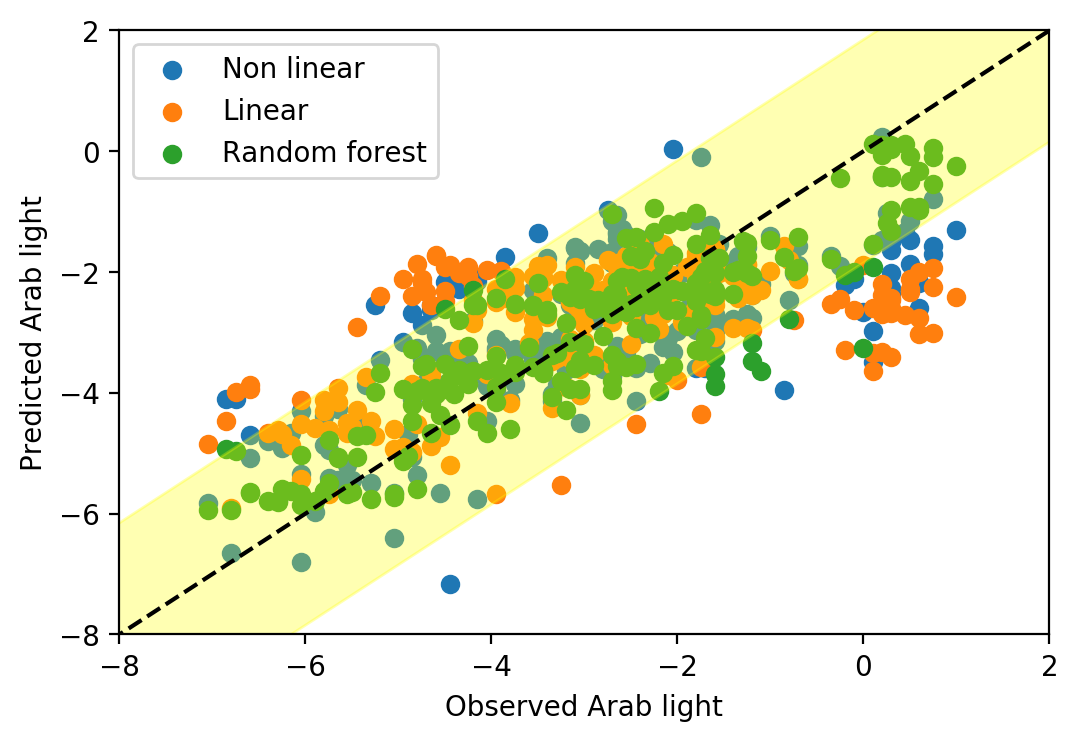

In [77]:
plt.rcParams['figure.dpi'] = 200

k1= combi["Dated Brent"]
k2= combi["Jet"]
k3= combi["VGO 2%"]
k4= combi["ULSD"]

linear_ArabL=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 + regr.coef_[2]*k3 + regr.coef_[3]*k4

plt_nl=plt.scatter(combi["Arab light"],Pred_ArabL)
plt_l =plt.scatter(combi["Arab light"],linear_ArabL)



x_all=combi[["Dated Brent","Jet","VGO 2%","ULSD"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Arab light"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Arab light"]), pop_mean-np.std(combi["Arab light"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Arab light')
plt.ylabel('Predicted Arab light')
plt.xlim([-8,2])
plt.ylim([-8,2])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [8]:

X = combi[['Arab Heavy']]
Y = combi['Arab light']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 0.3834722668270256
Coefficients: 
 [0.54079348]
                            OLS Regression Results                            
Dep. Variable:             Arab light   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1243.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           1.34e-95
Time:                        13:45:50   Log-Likelihood:                -262.32
No. Observations:                 236   AIC:                             528.6
Df Residuals:                     234   BIC:                             535.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
Pred_ArabH = 0.635846243381231*(combi["FO 3.5%"]) + 0.500212454466471*combi["Jet"] + 13/combi["Jet"] + -0.0025957970628738/np.exp(0.635846243381231*(combi["FO 3.5%"]) + 0.500212454466471*combi["Jet"]) - 5.90911403987227 - 0.0271336502751073*combi["Jet"]*(combi["FO 3.5%"]) - 0.0254885412647423*np.power(combi["Jet"],2)


Text(0, 0.5, 'Arab Heavy')

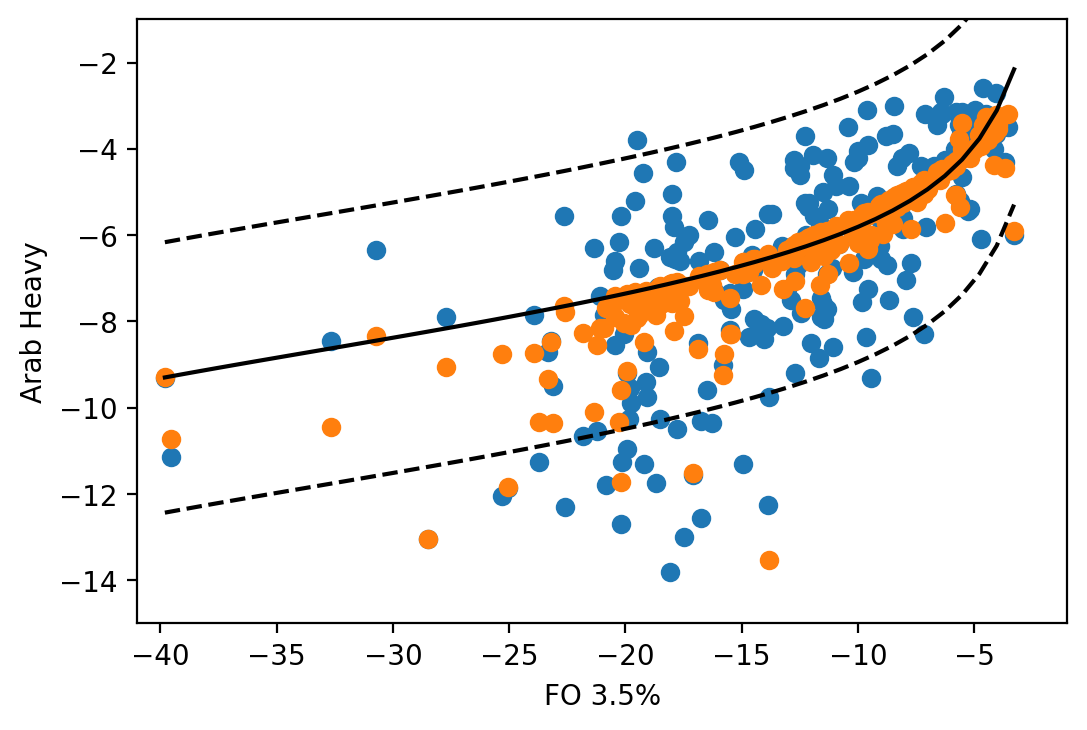

In [19]:
plt.rcParams['figure.dpi'] = 200
plt.scatter(combi["FO 3.5%"],combi["Arab Heavy"])
plt.scatter(combi["FO 3.5%"],Pred_ArabH)
plt.xlim([-41,-1])
plt.ylim([-15,-1])


FO35 = np.linspace(np.min(combi["FO 3.5%"]),np.max(combi["FO 3.5%"]),50)
Jet = np.linspace(np.min(combi["Jet"]),np.max(combi["Jet"]),50)
Jet=Jet[::-1]



P_ArabH = 0.635846243381231*(FO35) + 0.500212454466471*Jet + 13/Jet + -0.0025957970628738/np.exp(0.635846243381231*(FO35) + 0.500212454466471*Jet) - 5.90911403987227 - 0.0271336502751073*Jet*(FO35) - 0.0254885412647423*np.power(Jet,2)

plt.plot(FO35,P_ArabH,'k')
plt.plot(FO35,P_ArabH+np.std(combi["Arab Heavy"]),'--k')
plt.plot(FO35,P_ArabH-np.std(combi["Arab Heavy"]),'--k')

plt.xlabel('FO 3.5%')
plt.ylabel('Arab Heavy')

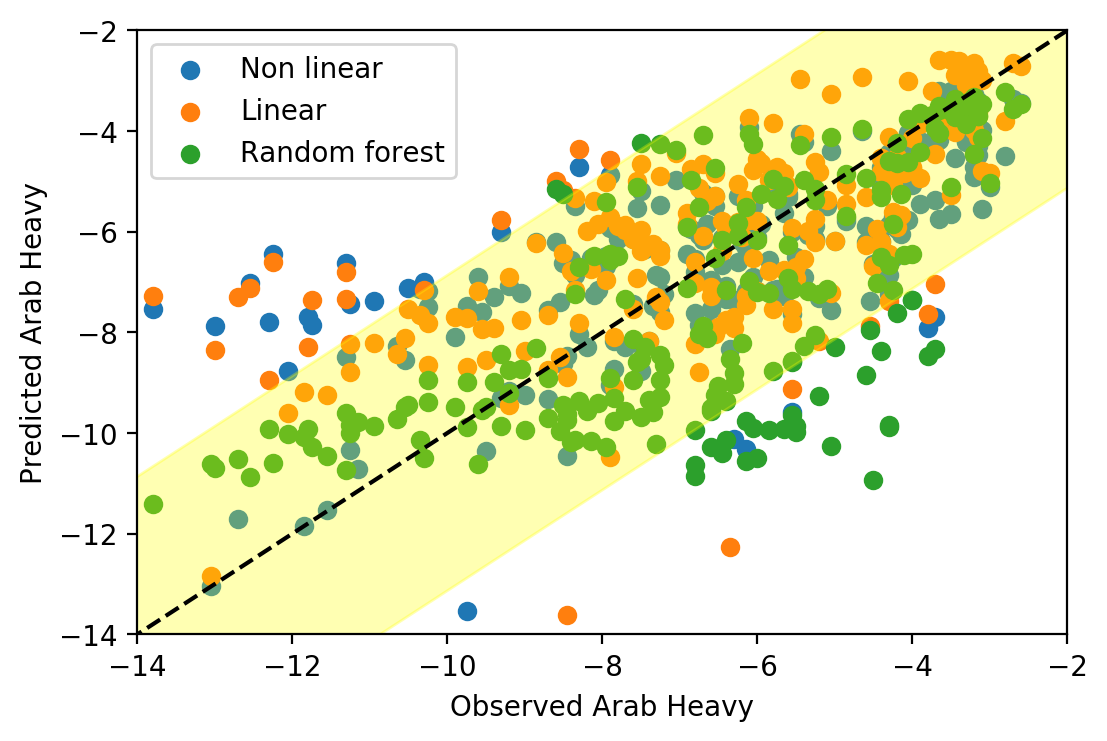

In [23]:
plt.rcParams['figure.dpi'] = 200

k1= combi["FO 3.5%"]
k2= combi["Jet"]


linear_ArabH=regr.intercept_+ regr.coef_[0]*k1 + regr.coef_[1]*k2 

plt_nl=plt.scatter(combi["Arab Heavy"],Pred_ArabH)
plt_l =plt.scatter(combi["Arab Heavy"],linear_ArabH)



x_all=combi[["FO 3.5%","Jet"]]
y_all=regressor.predict(x_all)
y_all=pd.DataFrame(y_all)
plt_rf=plt.scatter(combi["Arab Heavy"],y_all)

xvalue = np.linspace(-20,10,5)
pop_mean = xvalue
lsigma = plt.fill_between(xvalue, pop_mean+np.std(combi["Arab Heavy"]), pop_mean-np.std(combi["Arab Heavy"]), color='yellow', alpha=0.3)
plt.plot(xvalue, pop_mean, 'k--')
plt.xlabel('Observed Arab Heavy')
plt.ylabel('Predicted Arab Heavy')
plt.xlim([-14,-2])
plt.ylim([-14,-2])
plt.legend((plt_nl, plt_l,plt_rf),("Non linear","Linear","Random forest"))

plt.show()

In [80]:
#data =  {'Dated Brent':[64.89],'Jet':[15.53],'VGO 2%':[4.7],'ULSD':[15.38]}
DB= 64.89
Jet = 15.53
VGO2 = 4.7
ULSD = 15.38

linear_ArabL=regr.intercept_+ regr.coef_[0]*DB + regr.coef_[1]*Jet + regr.coef_[2]*VGO2 + regr.coef_[3]*ULSD
print(linear_ArabL)

-2.1747021100811166


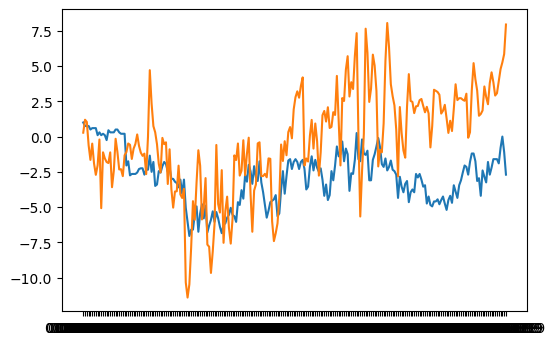

In [6]:
plt.plot(combi["Date"],combi["Arab light"])
plt.plot(combi["Date"],combi["VGO 2%"])
plt.show()